<a href="https://www.kaggle.com/code/khangtran94vn/khang-classification-academic?scriptVersionId=185581193" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [32]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e6/sample_submission.csv
/kaggle/input/playground-series-s4e6/train.csv
/kaggle/input/playground-series-s4e6/test.csv


In [33]:
train = pd.read_csv('/kaggle/input/playground-series-s4e6/train.csv')
print('Size of train dataset: ', train.shape)
print()
train.head()

Size of train dataset:  (76518, 38)



id  Marital status  Application mode  Application order  Course  \
0   0               1                 1                  1    9238   
1   1               1                17                  1    9238   
2   2               1                17                  2    9254   
3   3               1                 1                  3    9500   
4   4               1                 1                  2    9500   

   Daytime/evening attendance  Previous qualification  \
0                           1                       1   
1                           1                       1   
2                           1                       1   
3                           1                       1   
4                           1                       1   

   Previous qualification (grade)  Nacionality  Mother's qualification  ...  \
0                           126.0            1                       1  ...   
1                           125.0            1                      19  ...   
2                           137.0            1                       3  ...   
3                           131.0            1                      19  ...   
4                           132.0            1                      19  ...   

   Curricular units 2nd sem (credited)  Curricular units 2nd sem (enrolled)  \
0                                    0                                    6   
1                                    0                                    6   
2                                    0                                    6   
3                                    0                                    8   
4                                    0                                    7   

   Curricular units 2nd sem (evaluations)  \
0                                       7   
1                                       9   
2                                       0   
3                                      11   
4                                      12   

   Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
0                                    6                         12.428571   
1                                    0                          0.000000   
2                                    0                          0.000000   
3                                    7                         12.820000   
4                                    6                         12.933333   

   Curricular units 2nd sem (without evaluations)  Unemployment rate  \
0                                               0               11.1   
1                                               0               11.1   
2                                               0               16.2   
3                                               0               11.1   
4                                               0                7.6   

   Inflation rate   GDP    Target  
0             0.6  2.02  Graduate  
1             0.6  2.02   Dropout  
2             0.3 -0.92   Dropout  
3             0.6  2.02  Enrolled  
4             2.6  0.32  Graduate  

[5 rows x 38 columns]

In [34]:
test = pd.read_csv('/kaggle/input/playground-series-s4e6/test.csv')
print('Size of test dataset: ', test.shape)
print()
test.head()

Size of test dataset:  (51012, 37)



id  Marital status  Application mode  Application order  Course  \
0  76518               1                 1                  1    9500   
1  76519               1                 1                  1    9238   
2  76520               1                 1                  1    9238   
3  76521               1                44                  1    9147   
4  76522               1                39                  1    9670   

   Daytime/evening attendance  Previous qualification  \
0                           1                       1   
1                           1                       1   
2                           1                       1   
3                           1                      39   
4                           1                       1   

   Previous qualification (grade)  Nacionality  Mother's qualification  ...  \
0                           141.0            1                       3  ...   
1                           128.0            1                       1  ...   
2                           118.0            1                       1  ...   
3                           130.0            1                       1  ...   
4                           110.0            1                       1  ...   

   Curricular units 1st sem (without evaluations)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Curricular units 2nd sem (credited)  Curricular units 2nd sem (enrolled)  \
0                                    0                                    8   
1                                    0                                    6   
2                                    0                                    6   
3                                    3                                    8   
4                                    0                                    6   

   Curricular units 2nd sem (evaluations)  \
0                                       0   
1                                       6   
2                                      11   
3                                      14   
4                                       9   

   Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
0                                    0                          0.000000   
1                                    6                         13.500000   
2                                    5                         11.000000   
3                                    5                         11.000000   
4                                    4                         10.666667   

   Curricular units 2nd sem (without evaluations)  Unemployment rate  \
0                                               0               13.9   
1                                               0               11.1   
2                                               0               15.5   
3                                               0                8.9   
4                                               2                7.6   

   Inflation rate   GDP  
0            -0.3  0.79  
1             0.6  2.02  
2             2.8 -4.06  
3             1.4  3.51  
4             2.6  0.32  

[5 rows x 37 columns]

# Overview the dataset:

In [35]:
train.dtypes

id                                                  int64
Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance                          int64
Previous qualification                              int64
Previous qualification (grade)                    float64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Admission grade                                   float64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees u

In [36]:
train.describe().T

count          mean  \
id                                              76518.0  38258.500000   
Marital status                                  76518.0      1.111934   
Application mode                                76518.0     16.054419   
Application order                               76518.0      1.644410   
Course                                          76518.0   9001.286377   
Daytime/evening attendance                      76518.0      0.915314   
Previous qualification                          76518.0      3.658760   
Previous qualification (grade)                  76518.0    132.378766   
Nacionality                                     76518.0      1.226600   
Mother's qualification                          76518.0     19.837633   
Father's qualification                          76518.0     23.425076   
Mother's occupation                             76518.0      8.583196   
Father's occupation                             76518.0      8.882172   
Admission grade                                 76518.0    125.363971   
Displaced                                       76518.0      0.569265   
Educational special needs                       76518.0      0.003738   
Debtor                                          76518.0      0.071382   
Tuition fees up to date                         76518.0      0.893646   
Gender                                          76518.0      0.315821   
Scholarship holder                              76518.0      0.247393   
Age at enrollment                               76518.0     22.278653   
International                                   76518.0      0.006626   
Curricular units 1st sem (credited)             76518.0      0.188871   
Curricular units 1st sem (enrolled)             76518.0      5.891516   
Curricular units 1st sem (evaluations)          76518.0      7.352362   
Curricular units 1st sem (approved)             76518.0      4.178520   
Curricular units 1st sem (grade)                76518.0      9.995862   
Curricular units 1st sem (without evaluations)  76518.0      0.057960   
Curricular units 2nd sem (credited)             76518.0      0.137053   
Curricular units 2nd sem (enrolled)             76518.0      5.933414   
Curricular units 2nd sem (evaluations)          76518.0      7.234468   
Curricular units 2nd sem (approved)             76518.0      4.007201   
Curricular units 2nd sem (grade)                76518.0      9.626085   
Curricular units 2nd sem (without evaluations)  76518.0      0.062443   
Unemployment rate                               76518.0     11.520340   
Inflation rate                                  76518.0      1.228218   
GDP                                             76518.0     -0.080921   

                                                         std    min  \
id                                              22088.988286   0.00   
Marital status                                      0.441669   1.00   
Application mode                                   16.682337   1.00   
Application order                                   1.229645   0.00   
Course                                           1803.438531  33.00   
Daytime/evening attendance                          0.278416   0.00   
Previous qualification                              8.623774   1.00   
Previous qualification (grade)                     10.995328  95.00   
Nacionality                                         3.392183   1.00   
Mother's qualification                             15.399456   1.00   
Father's qualification                             14.921164   1.00   
Mother's occupation                                17.471591   0.00   
Father's occupation                                16.803940   0.00   
Admission grade                                    12.562328  95.00   
Displaced                                           0.495182   0.00   
Educational special needs                           0.061023   0.00   
Debtor                                              0.257463   0.00 

In [37]:
def check_missing(df,df_name):
    if df.isnull().sum().sum() == 0:
        print('{} have no missing values'.format(df_name))

check_missing(train,'Train')
check_missing(test,'Test')

Train have no missing values
Test have no missing values


In [38]:
def check_duplicate(df,df_name):
    if df.duplicated().sum() == 0:
        print('{} have no duplicated row'.format(df_name))

check_duplicate(train,'Train')
check_duplicate(test,'Test')

Train have no duplicated row
Test have no duplicated row


## Define X, y:

In [39]:
X = train.copy()
X = X.drop(['Target','id'],axis=1)
y = train['Target']

In [40]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76518 entries, 0 to 76517
Data columns (total 36 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  76518 non-null  int64  
 1   Application mode                                76518 non-null  int64  
 2   Application order                               76518 non-null  int64  
 3   Course                                          76518 non-null  int64  
 4   Daytime/evening attendance                      76518 non-null  int64  
 5   Previous qualification                          76518 non-null  int64  
 6   Previous qualification (grade)                  76518 non-null  float64
 7   Nacionality                                     76518 non-null  int64  
 8   Mother's qualification                          76518 non-null  int64  
 9   Father's qualification                 

## Define category features and number features:

In [41]:
cat_features = list(X.columns[:6])+list(X.columns[7:12]) + list(X.columns[13:19]) + list(X.columns[20:21])
cat_features

['Marital status',
 'Application mode',
 'Application order',
 'Course',
 'Daytime/evening attendance',
 'Previous qualification',
 'Nacionality',
 "Mother's qualification",
 "Father's qualification",
 "Mother's occupation",
 "Father's occupation",
 'Displaced',
 'Educational special needs',
 'Debtor',
 'Tuition fees up to date',
 'Gender',
 'Scholarship holder',
 'International']

In [42]:
num_features = list(set(X.columns) - set(cat_features))

total = []
for i in train.columns:
    if i in num_features:
        total.append(i)
        
num_features = total
num_features

['Previous qualification (grade)',
 'Admission grade',
 'Age at enrollment',
 'Curricular units 1st sem (credited)',
 'Curricular units 1st sem (enrolled)',
 'Curricular units 1st sem (evaluations)',
 'Curricular units 1st sem (approved)',
 'Curricular units 1st sem (grade)',
 'Curricular units 1st sem (without evaluations)',
 'Curricular units 2nd sem (credited)',
 'Curricular units 2nd sem (enrolled)',
 'Curricular units 2nd sem (evaluations)',
 'Curricular units 2nd sem (approved)',
 'Curricular units 2nd sem (grade)',
 'Curricular units 2nd sem (without evaluations)',
 'Unemployment rate',
 'Inflation rate',
 'GDP']

In [43]:
assert len(cat_features) == len(num_features)
print('Number of categori features and number features are the SAME')

Number of categori features and number features are the SAME


# Correlation Matrix for Train dataset:

In [ ]:
features = [col for col in test.columns if col != 'id']
mask = np.triu(np.ones_like(test[features].corr()))

plt.figure(figsize=(15, 8))
sns.heatmap(train[features].corr(),mask=mask, center=0, cmap='coolwarm', linewidth=.5,annot=True,fmt='.1f')
plt.title('Correlation Matrix by Pearson')
plt.show()

# Mutual Information Score:

In [45]:
from sklearn.feature_selection import mutual_info_classif

def make_mi_scores(X, y):
    mi_scores = mutual_info_classif(X, y)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y)
mi_scores

Curricular units 2nd sem (approved)               0.477682
Curricular units 2nd sem (grade)                  0.414942
Curricular units 1st sem (approved)               0.408907
Curricular units 1st sem (grade)                  0.365679
Curricular units 2nd sem (evaluations)            0.198651
Curricular units 1st sem (evaluations)            0.187701
Course                                            0.113741
Admission grade                                   0.108172
Tuition fees up to date                           0.108116
Age at enrollment                                 0.096447
Scholarship holder                                0.093674
Previous qualification (grade)                    0.088636
Application mode                                  0.084479
Curricular units 2nd sem (enrolled)               0.078537
Curricular units 1st sem (enrolled)               0.076601
Gender                                            0.055802
Previous qualification                            0.0392

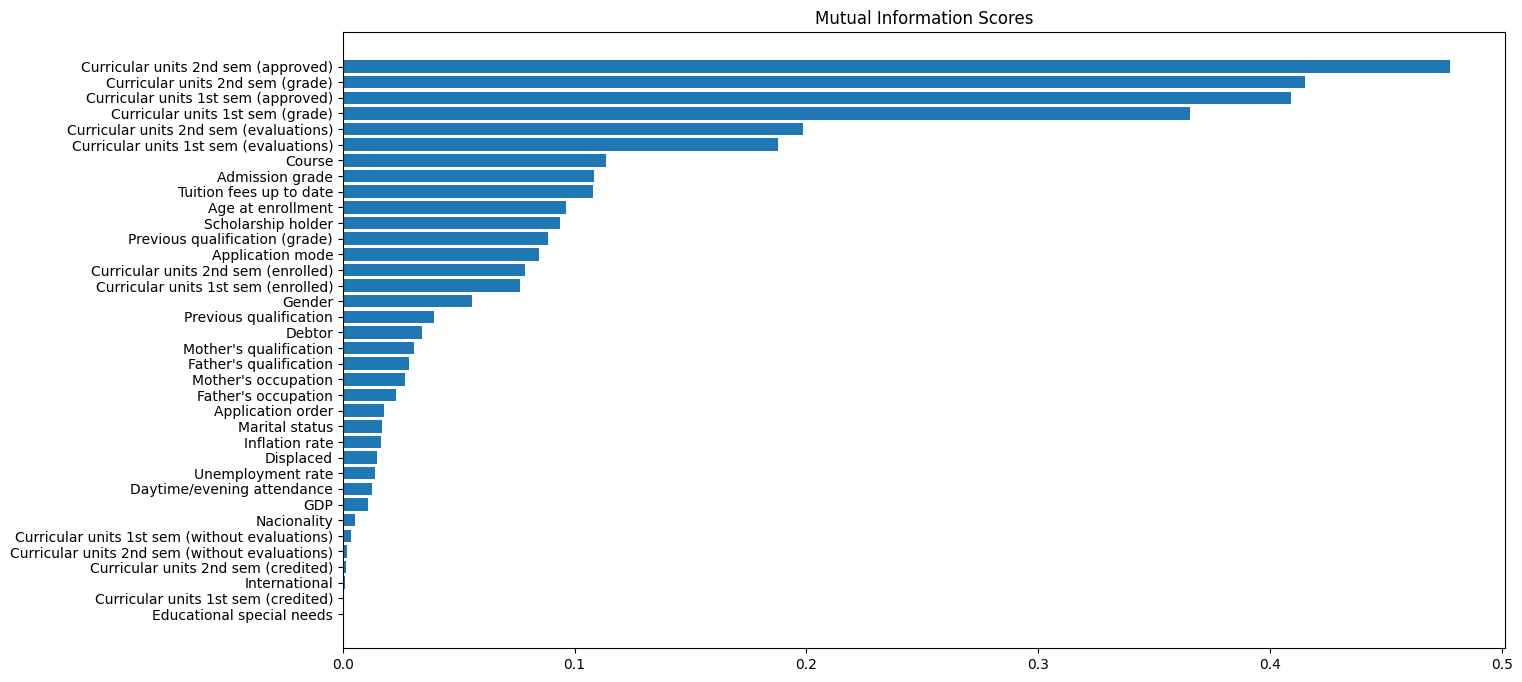

In [46]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(15, 8))
plot_mi_scores(mi_scores)

# EDA for Category Column:

## Target column:

<Axes: xlabel='Target', ylabel='count'>

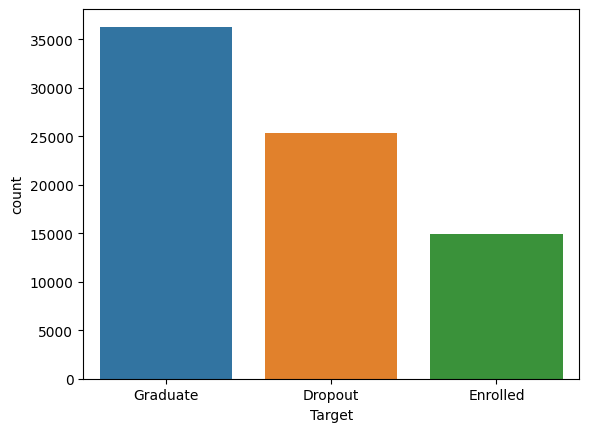

In [47]:
sns.countplot(x='Target',data=train)

In [48]:
y.value_counts(normalize=True)

Target
Graduate    0.474163
Dropout     0.330589
Enrolled    0.195248
Name: proportion, dtype: float64

The target columns have 3 values: Graduate (47.4%) - Dropout (33.1%) - Enrolled (19.5%)

## Category columns:

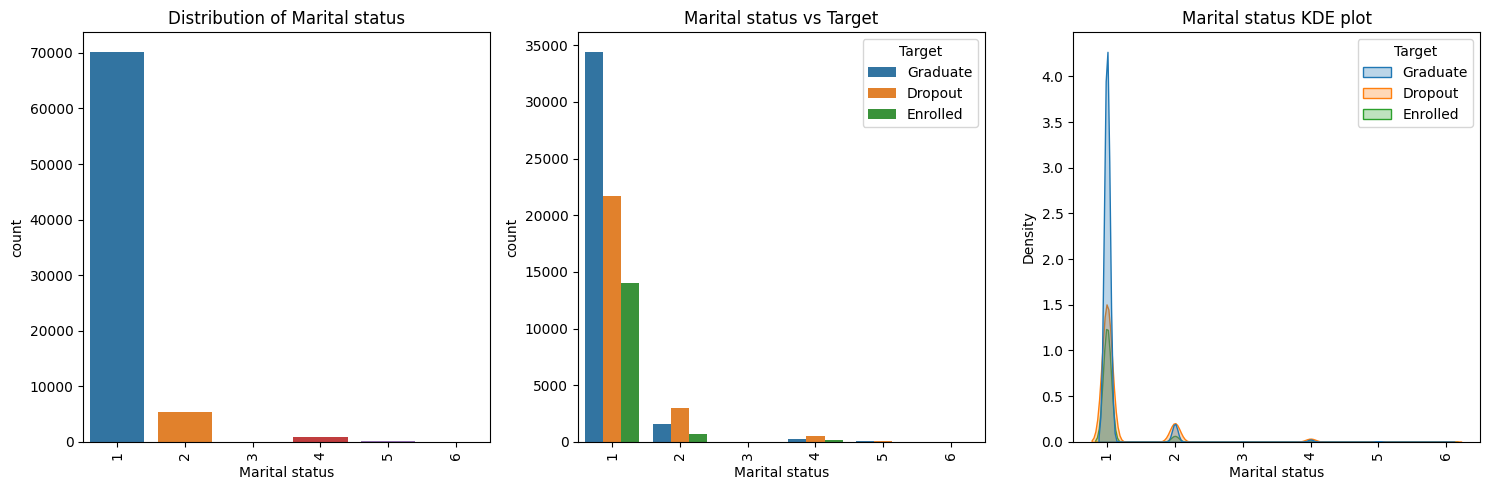

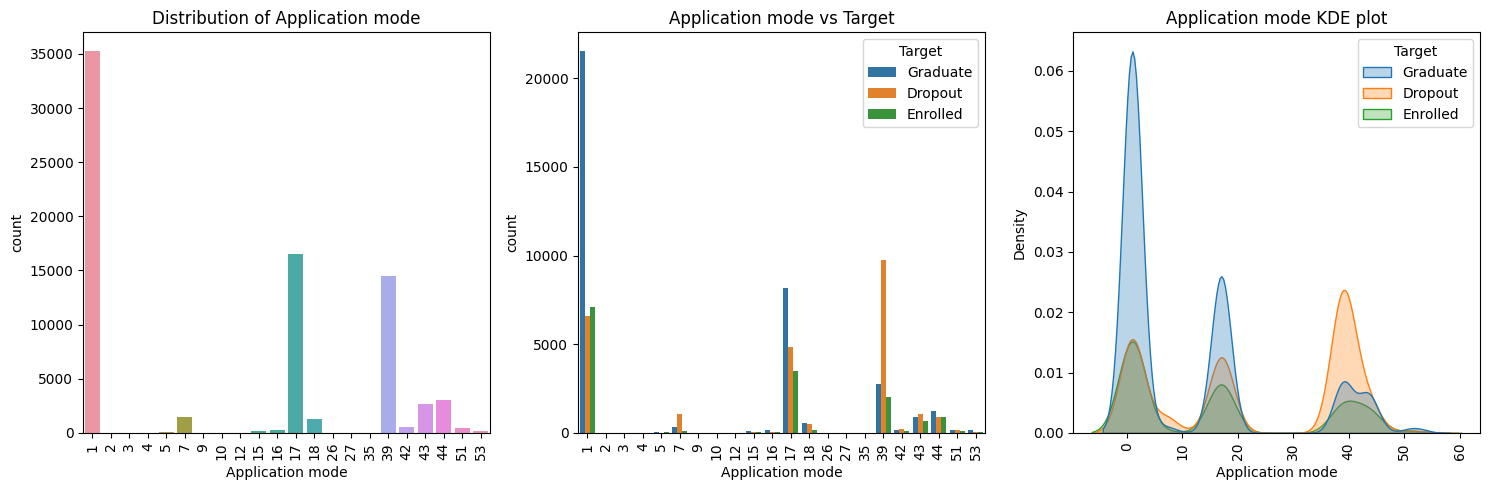

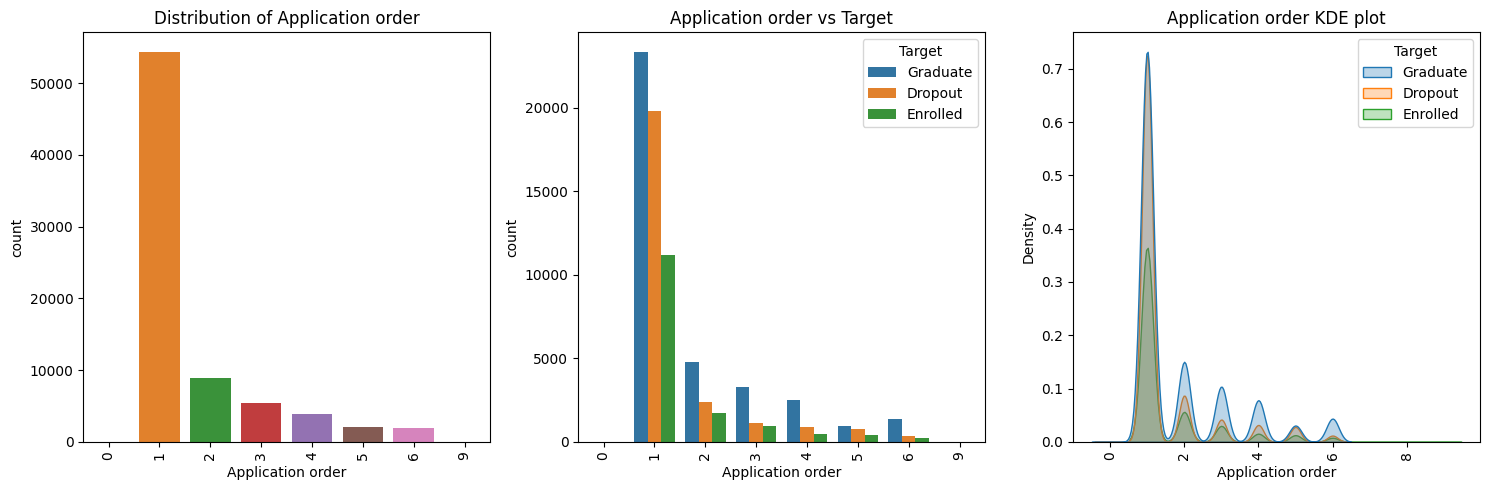

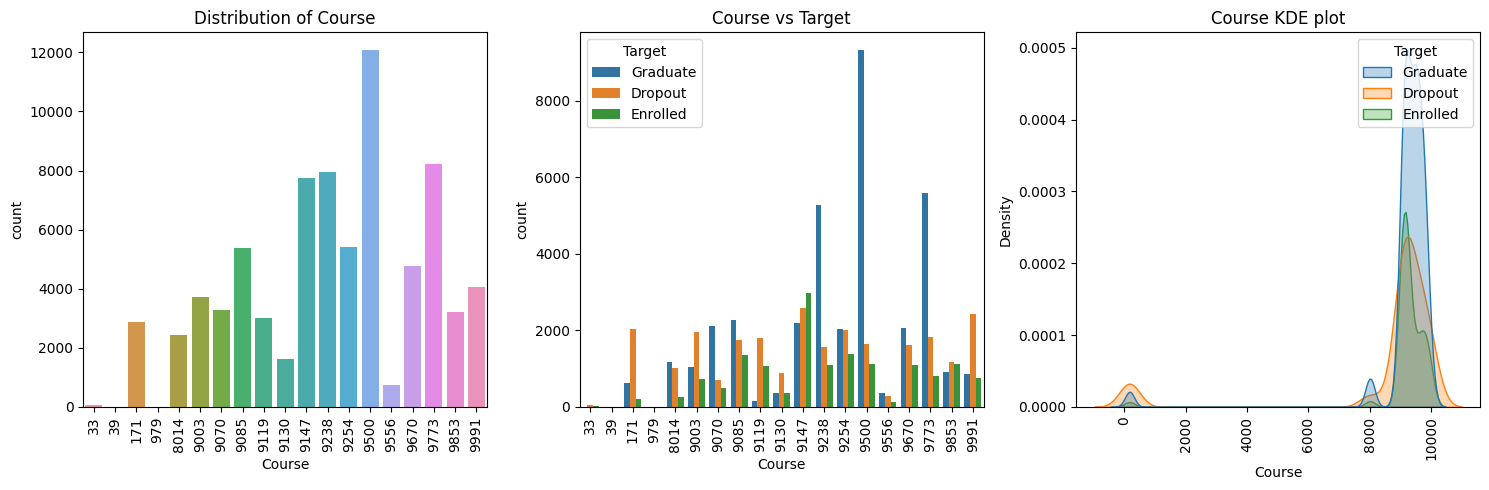

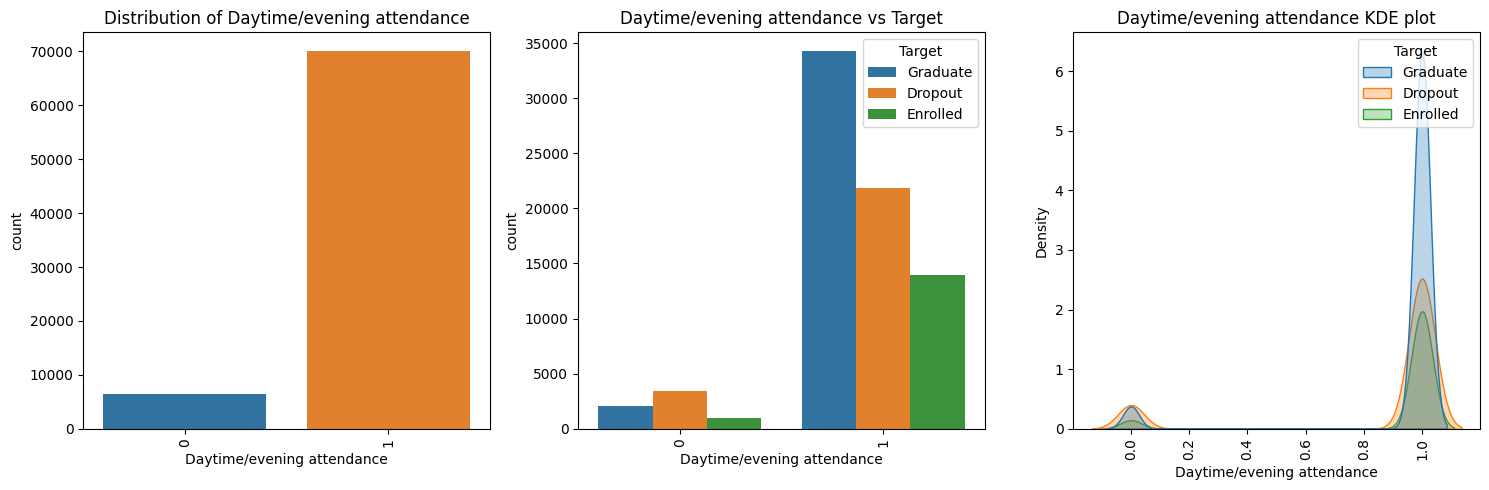

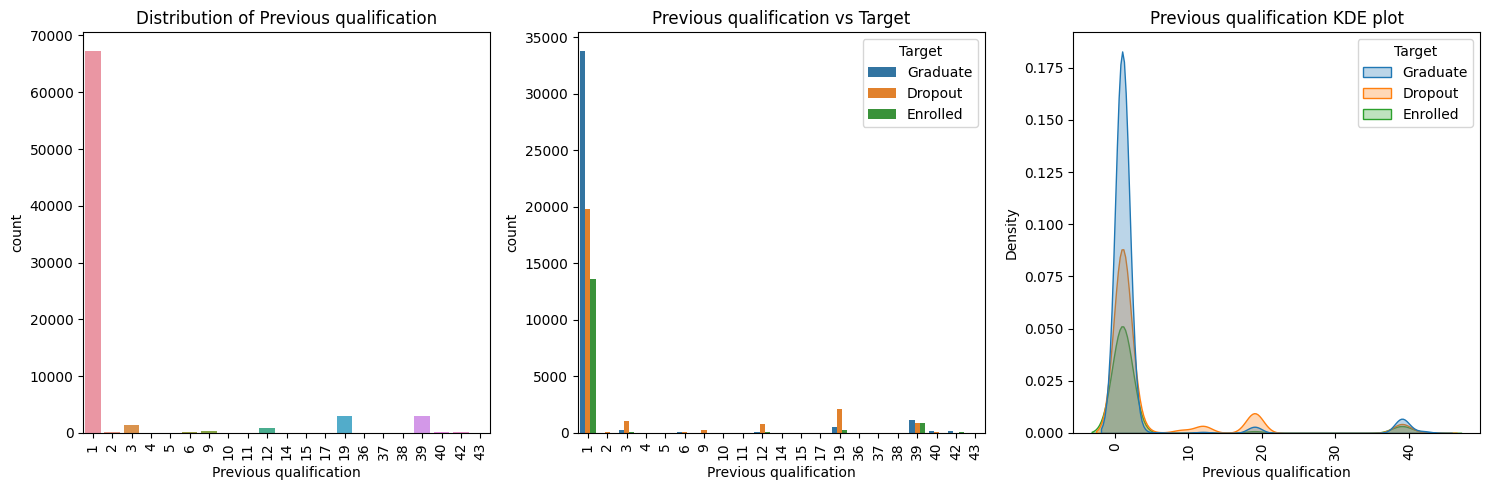

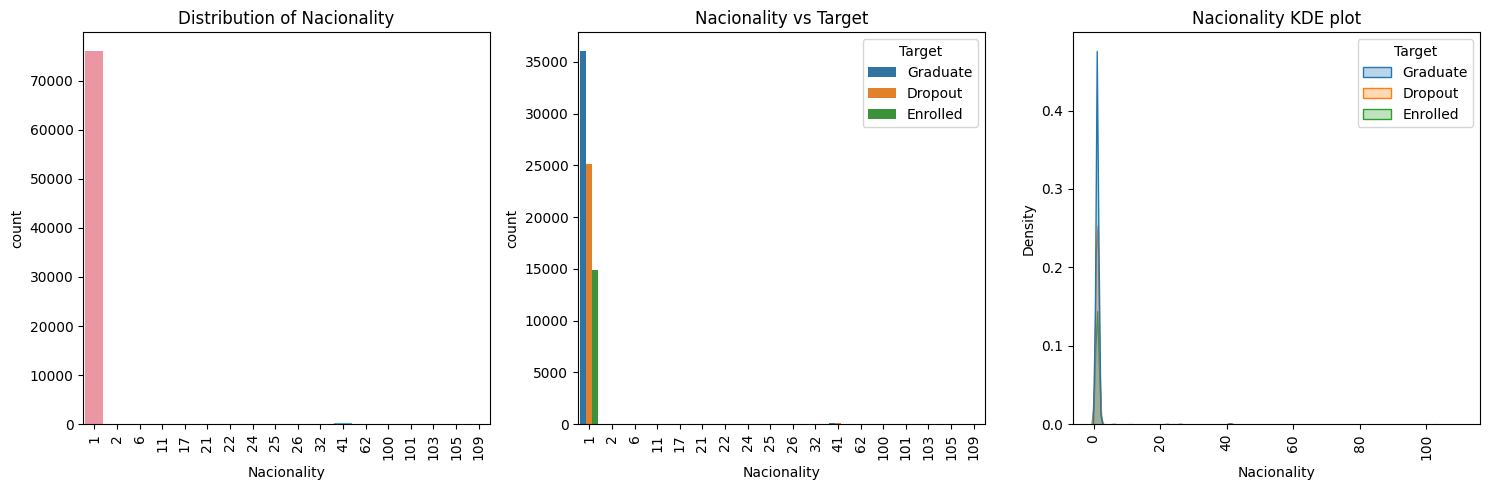

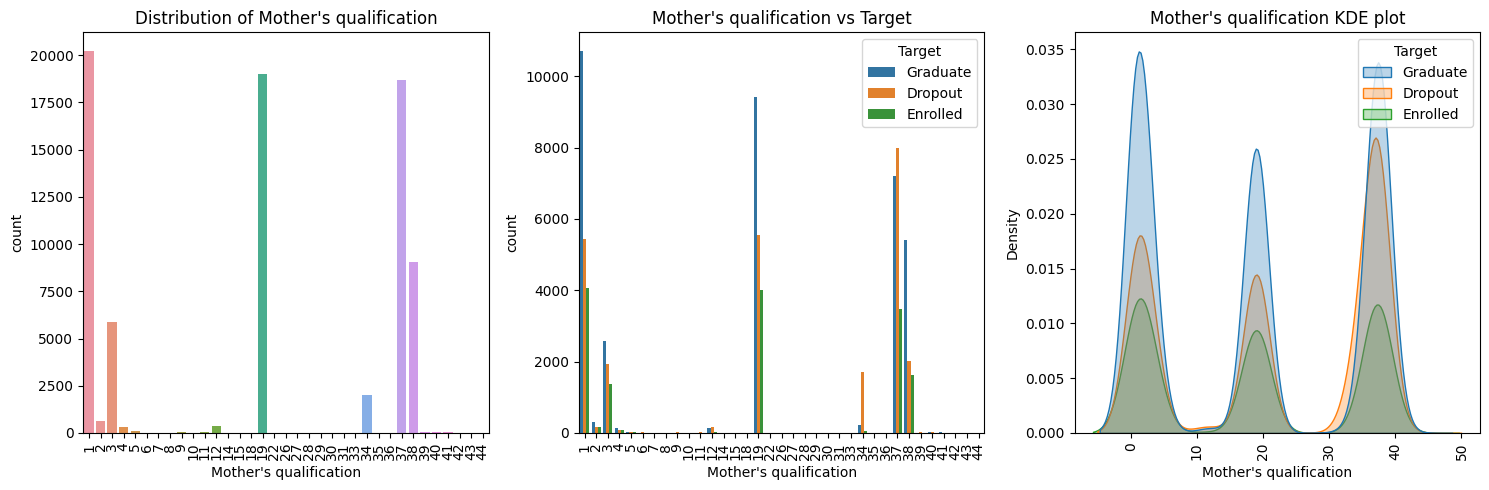

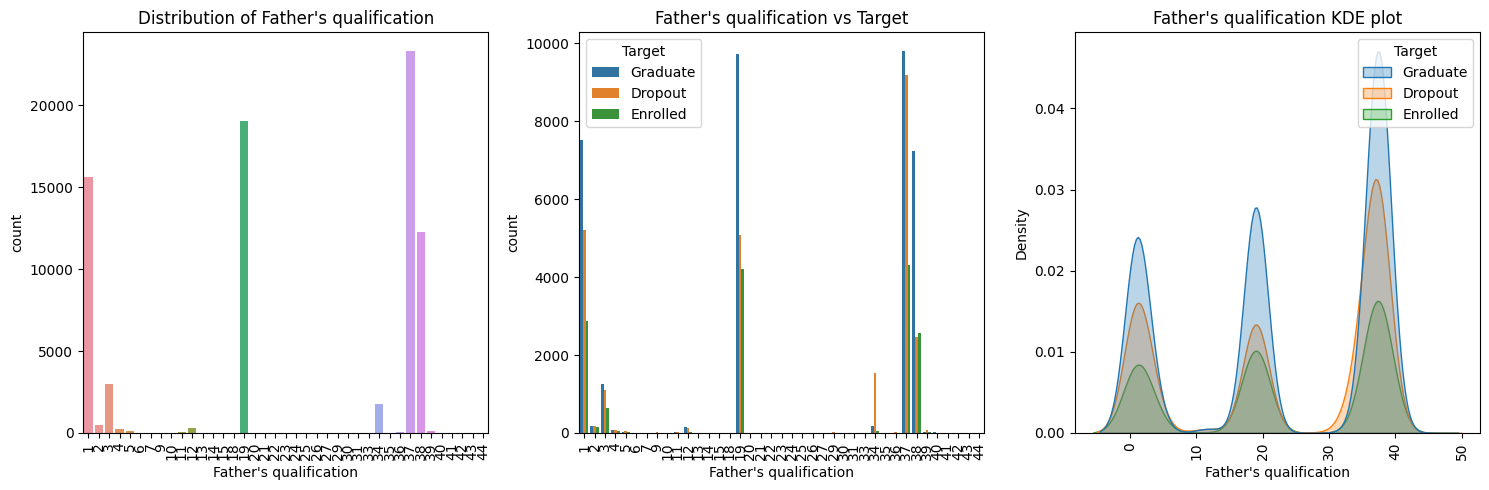

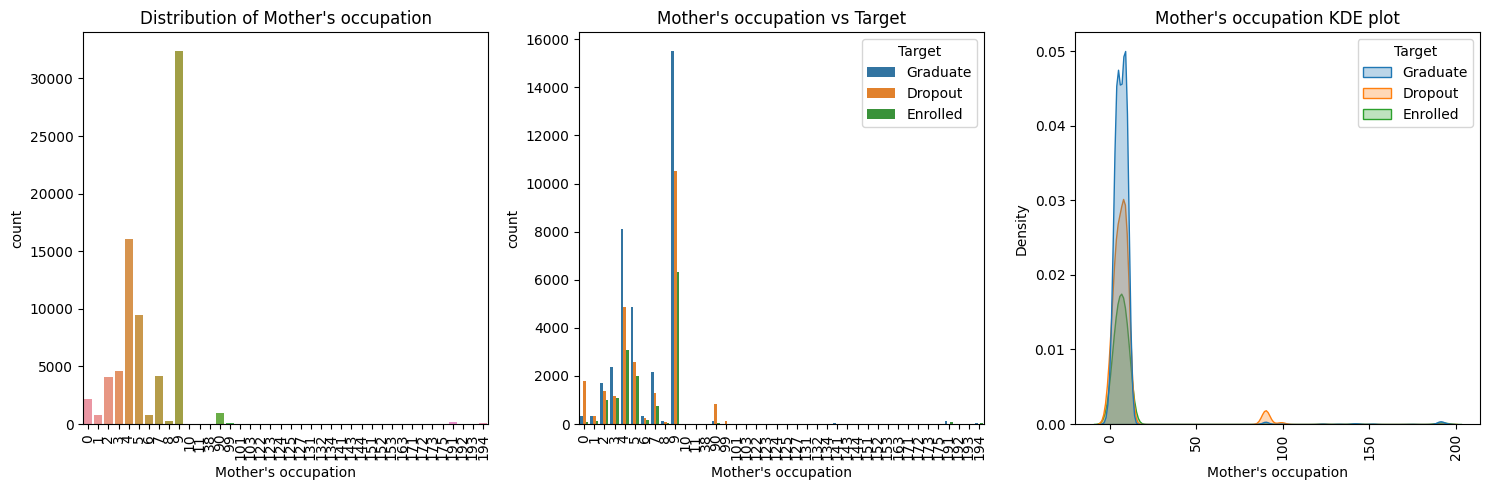

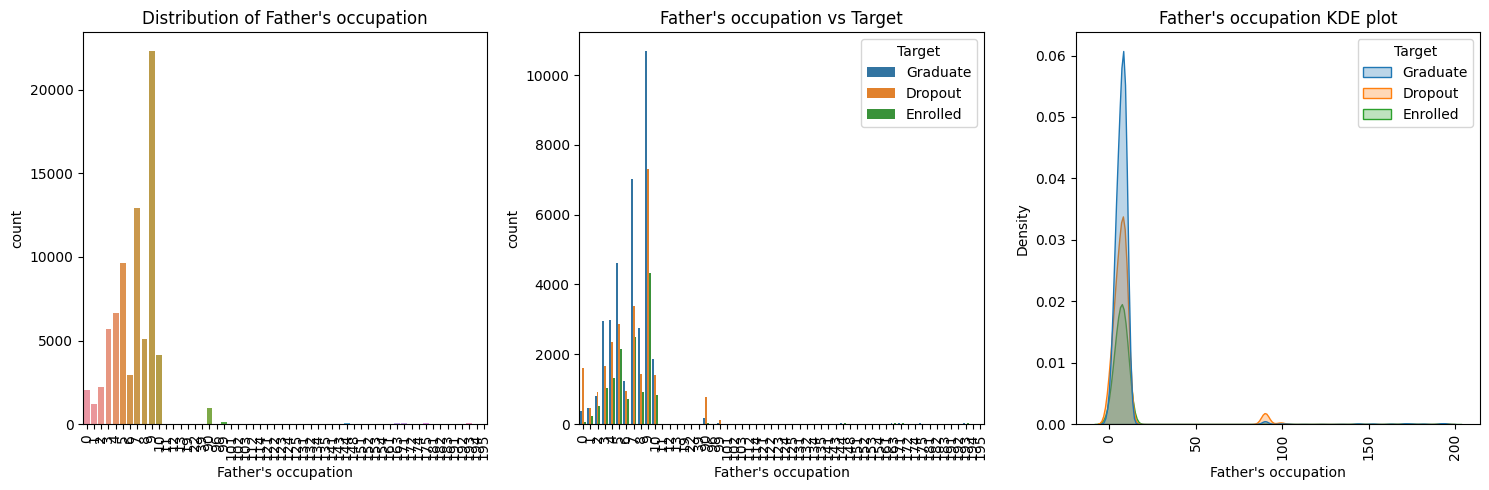

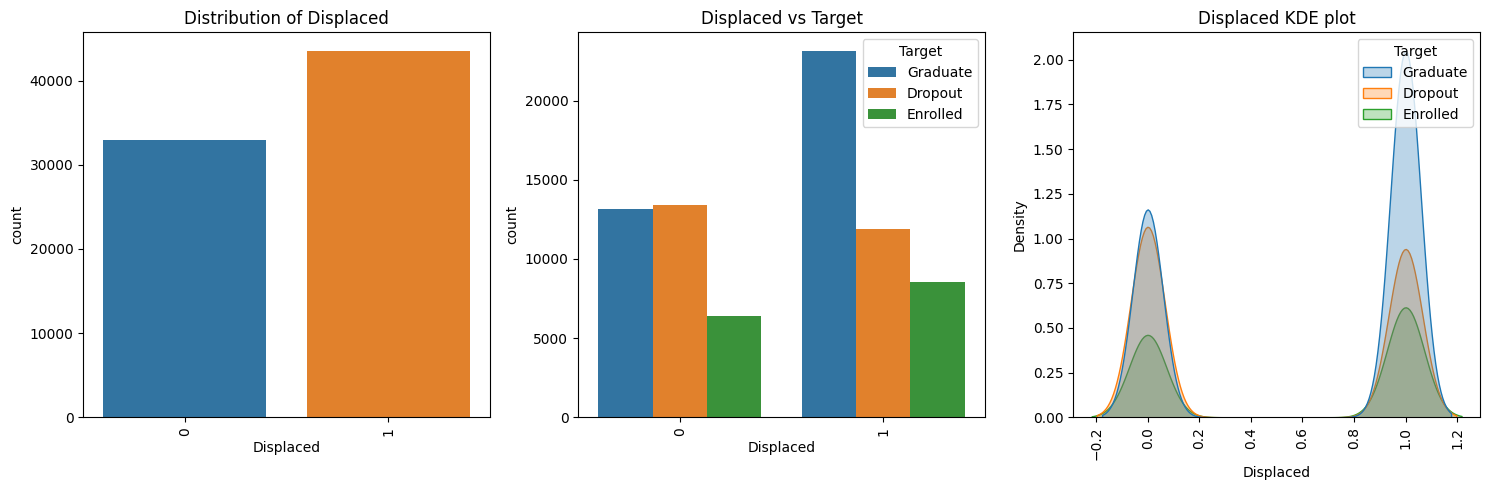

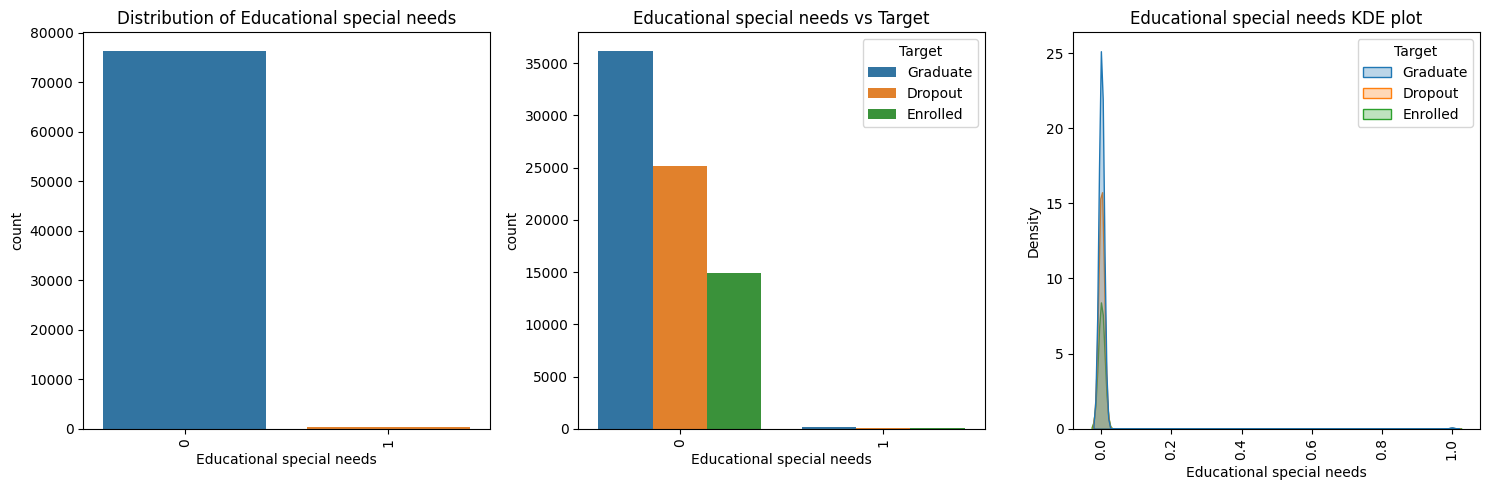

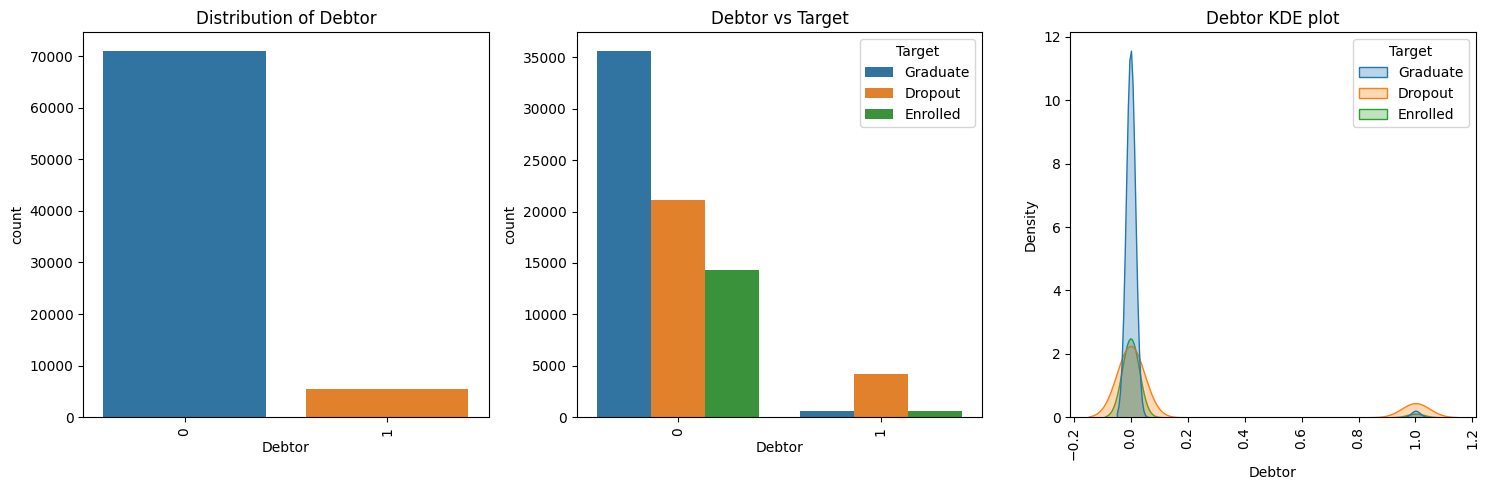

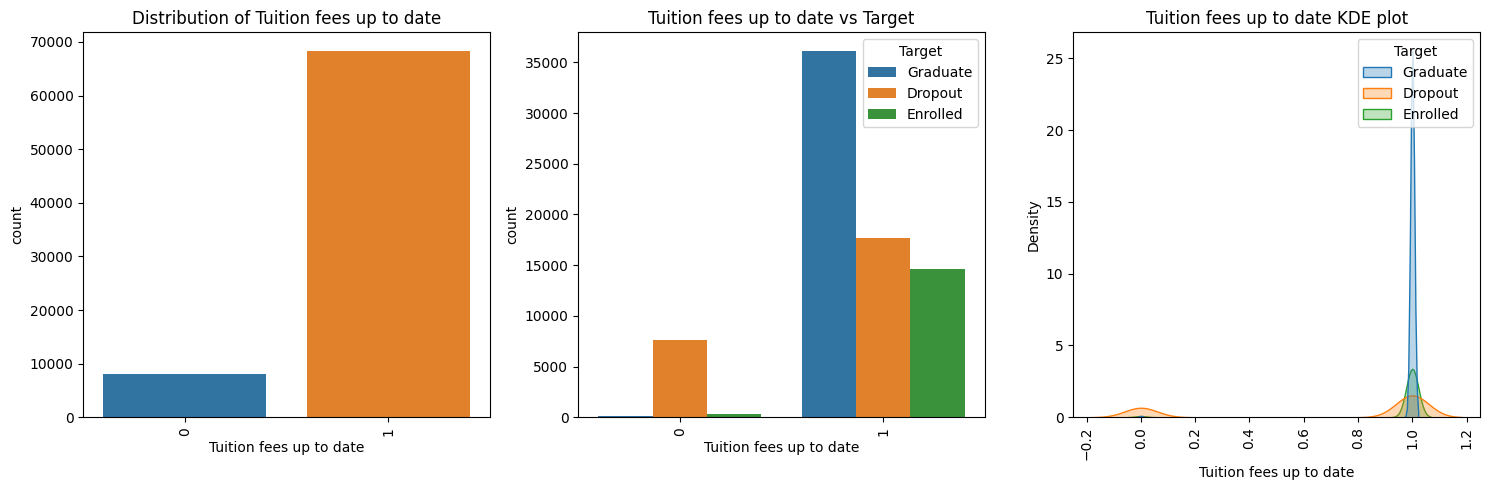

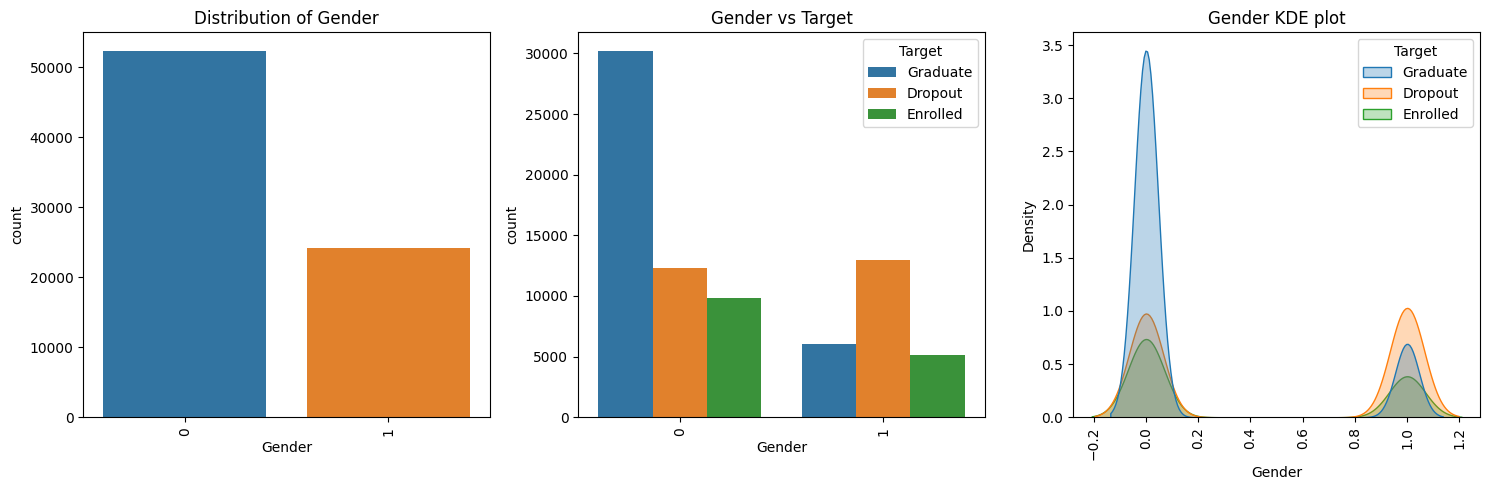

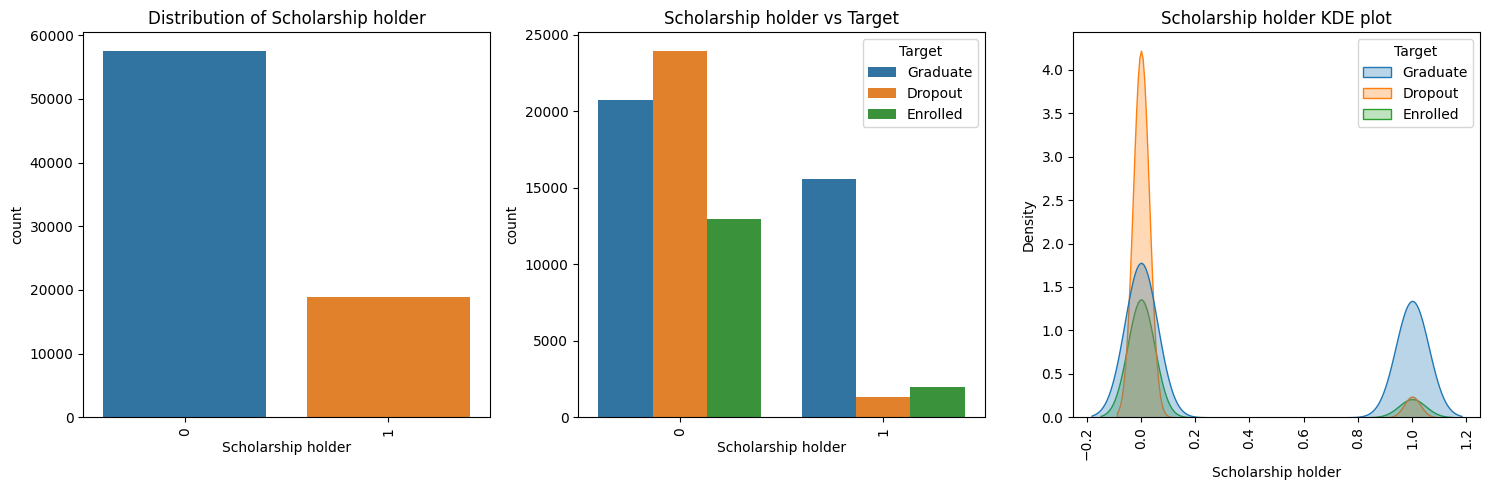

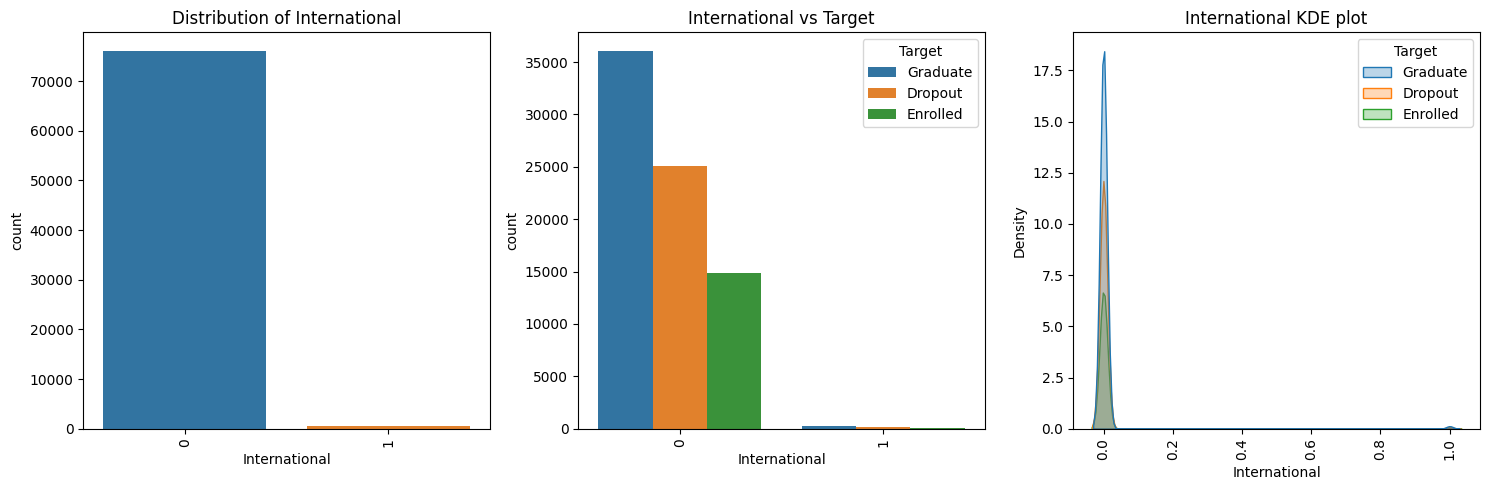

In [49]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

for cat in cat_features:
    fig, ax = plt.subplots(1, 3, figsize=(15, 5)) 
    sns.countplot(x=cat, data=train, ax=ax[0])
    ax[0].set_title(f'Distribution of {cat}')
    ax[0].tick_params(axis='x', rotation=90)
    
    sns.countplot(x=cat, data=train, hue='Target', ax=ax[1])
    ax[1].set_title(f'{cat} vs Target')
    ax[1].tick_params(axis='x', rotation=90)
    
    sns.kdeplot(x=train[cat], data=train, hue='Target', ax=ax[2], fill=True, alpha=0.3)
    ax[2].set_title(f'{cat} KDE plot')
    ax[2].tick_params(axis='x', rotation=90)
    
    plt.tight_layout()
    plt.show()

### Overview category features:

1. Marital Status: Most of students are single. and when they are single, they tend to Graduate. While for the remaining categories, they tend to dropout.

1. Applicate mode: Only category 7 (Holders of other higher courses), 39 (Over 23 years old), 43 (Change of course) have the percentage of dropout > graduate

1. Applicate order: Tend to graduate from any category of application order

1. Course: Top 4 course that have the most people: (9500 - Nursing, 9147 - Management, 9238 - Social Service, 9773 - Journalism and Communication). The six following courses have a much higher dropout rate (171 - Animation and Multimedia Design, 9003 - Agronomy, 9119 - Informatics Engineering, 9130 - Equinculture, 9853 - Basic Education, 9991 - Management (evening attendance). The six following courses have a much higher graduate rate (9070 - Communication Design, 9085 - Veterinary Nursing, 9238 - Social Service, 9500 - Nursing, 9773 - Journalism and Communication)

1. Day/evening: Most students attend day classes and most graduate, while students who attend evening classes tend to drop out

1. Nacionality vs International: Majority is Portuguese.

1. Displaced: When student have displaced, they tend to graduate.

1. Educational special needs: Most of student don't need educational special.

1. Debtor: The dropout rate among indebted students is very high.

1. Tuition fees up to date: Student who didn't pay tuition on time most likely dropout.

1. Gender: Male students have a much higher dropout rate than female students.

1. Scholarship holders: Students who are more likely to receive scholarships tend to graduate, unlike students who do not receive scholarships, who tend to drop out

### Remaining five category features:
Previous qualification, Mother's qualification, Father's qualification, Mother's occupation, Father's occupation.

Those features have many values, therefore, we should catogorize their value into small values and then merge for further analysis.

In [50]:
education_categories = {
    1: "upper_secondary",   # highschool
    2: "graduate",
    3: "graduate",
    4: "masters",
    5: "doctorate",
    6: "graduate",
    9: "upper_secondary",   # highschool
    10: "lower_secondary",  # secondary
    11: "elementary",
    12: "upper_secondary",  # highschool
    13: "upper_secondary",  # highschool
    14: "upper_secondary",  # highschool
    18: "upper_secondary",  # highschool
    19: "lower_secondary",  # secondary
    20: "upper_secondary",  # highschool
    22: "upper_secondary",  # highschool
    25: "upper_secondary",  # highschool
    26: "elementary",
    27: "lower_secondary",  # secondary
    29: "lower_secondary",  # secondary
    30: "lower_secondary",  # secondary
    31: "upper_secondary",  # highschool
    33: "upper_secondary",  # highschool
    34: "unknown",
    35: "elementary",
    36: "elementary",
    37: "elementary",
    38: "lower_secondary",  # secondary
    39: "graduate",
    40: "graduate",
    41: "graduate",
    42: "graduate",
    43: "masters",
    44: "doctorate"
}

train['previous_qual'] = train['Previous qualification'].map(education_categories)
train['father_qual'] = train["Father's qualification"].map(education_categories)
train['mother_qual'] = train["Mother's qualification"].map(education_categories)

profession_categories = {
    0: "student",
    1: "managerial",
    2: "professional",
    3: "technical",
    4: "clerical",
    5: "service",
    6: "agriculture",
    7: "craftsmen",
    8: "factory",
    9: "elementary",
    10: "armed_forces",
    90: "unknown",
    99: "unknown",
    122: "professional",
    123: "professional",
    125: "professional",
    131: "technical",
    132: "technical",
    134: "technical",
    141: "clerical",
    143: "clerical",
    144: "clerical",
    151: "service",
    152: "service",
    153: "service",
    171: "craftsmen",
    173: "craftsmen",
    175: "craftsmen",
    191: "service",
    192: "elementary",
    193: "elementary",
    194: "service"
}

train["father_occ"] = train["Father's occupation"].map(profession_categories)
train["mother_occ"] = train["Mother's occupation"].map(profession_categories)
new = ['previous_qual','father_qual','mother_qual','father_occ','mother_occ']
for i in new:
    train[i] = train[i].fillna('unknown')
train.head()

id  Marital status  Application mode  Application order  Course  \
0   0               1                 1                  1    9238   
1   1               1                17                  1    9238   
2   2               1                17                  2    9254   
3   3               1                 1                  3    9500   
4   4               1                 1                  2    9500   

   Daytime/evening attendance  Previous qualification  \
0                           1                       1   
1                           1                       1   
2                           1                       1   
3                           1                       1   
4                           1                       1   

   Previous qualification (grade)  Nacionality  Mother's qualification  ...  \
0                           126.0            1                       1  ...   
1                           125.0            1                      19  ...   
2                           137.0            1                       3  ...   
3                           131.0            1                      19  ...   
4                           132.0            1                      19  ...   

   Curricular units 2nd sem (without evaluations)  Unemployment rate  \
0                                               0               11.1   
1                                               0               11.1   
2                                               0               16.2   
3                                               0               11.1   
4                                               0                7.6   

   Inflation rate   GDP    Target    previous_qual      father_qual  \
0             0.6  2.02  Graduate  upper_secondary  lower_secondary   
1             0.6  2.02   Dropout  upper_secondary  lower_secondary   
2             0.3 -0.92   Dropout  upper_secondary  lower_secondary   
3             0.6  2.02  Enrolled  upper_secondary         graduate   
4             2.6  0.32  Graduate  upper_secondary       elementary   

       mother_qual    father_occ    mother_occ  
0  upper_secondary       service       service  
1  lower_secondary    elementary    elementary  
2         graduate     technical  professional  
3  lower_secondary  professional     technical  
4  lower_secondary    elementary      clerical  

[5 rows x 43 columns]

Plot with those new five columns:

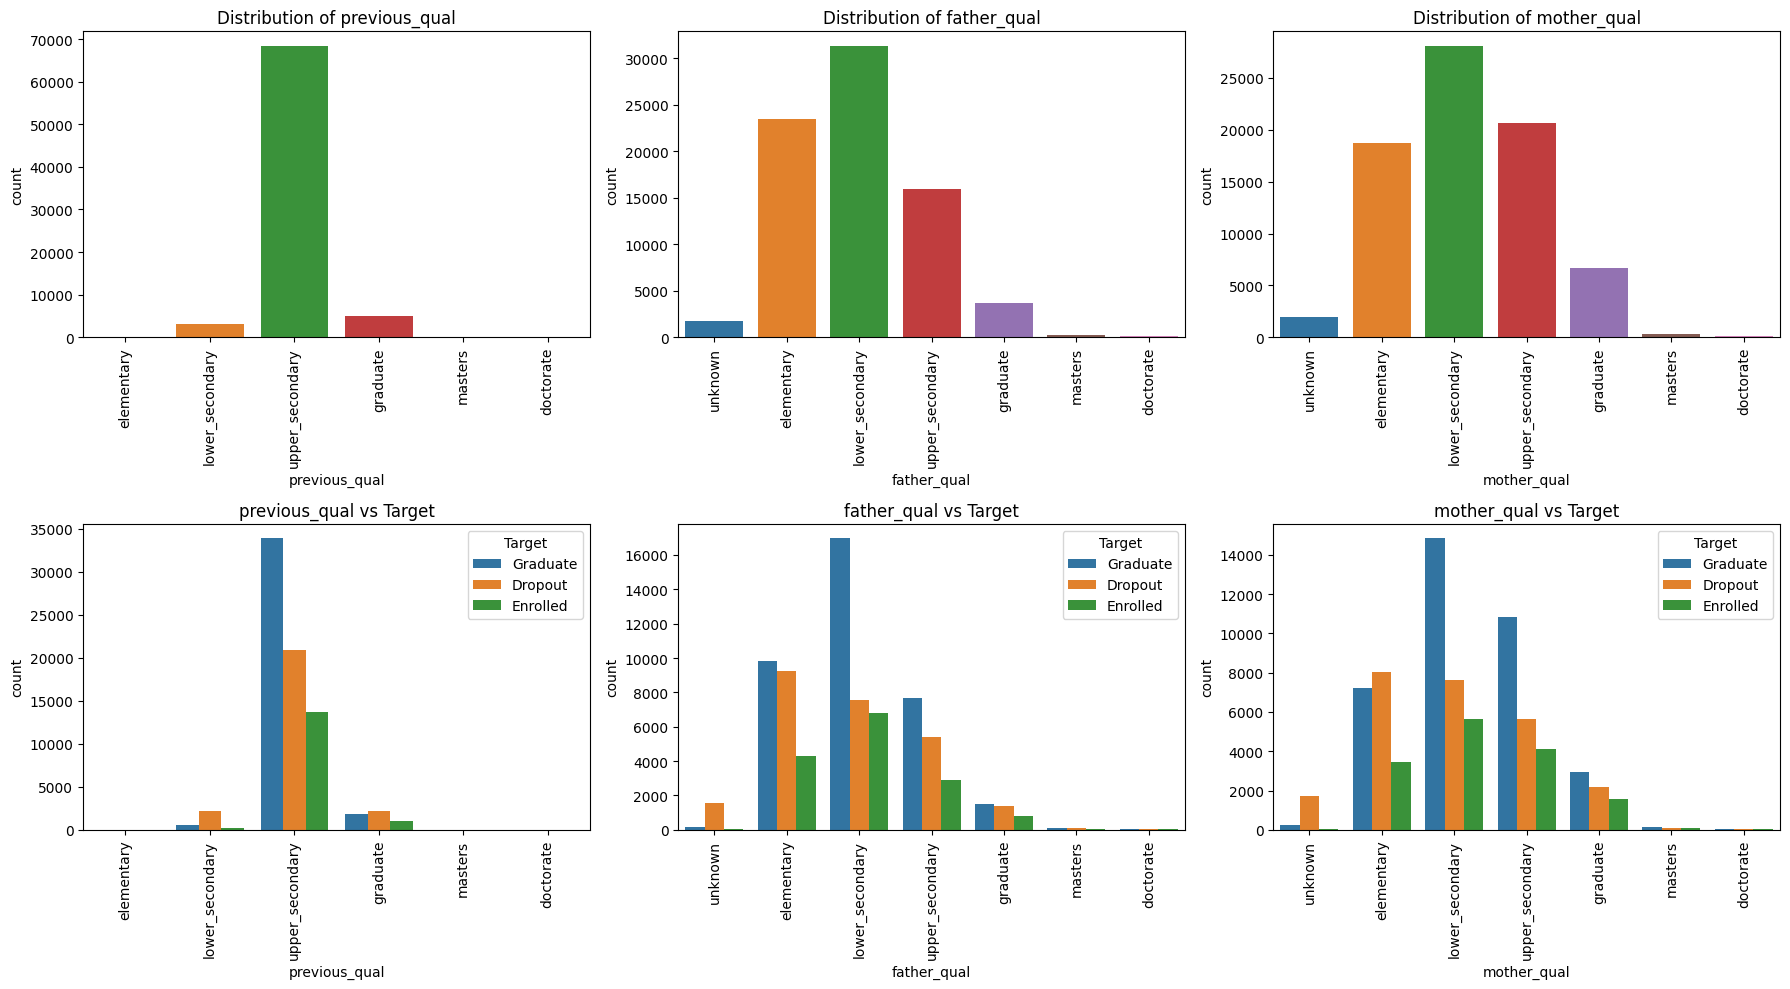

In [51]:
new_qual = ['previous_qual', 'father_qual', 'mother_qual']
# Assuming train is your dataset

educational_levels = ["unknown","elementary","lower_secondary", "upper_secondary","graduate", "masters", "doctorate"]

# Get unique values in each new_qual variable from the dataset
unique_previous_qual = train['previous_qual'].unique()
unique_father_qual = train['father_qual'].unique()
unique_mother_qual = train['mother_qual'].unique()

# Creating the ordered list of educational levels for each variable
educational_levels_previous_qual = ["elementary", "lower_secondary", "upper_secondary","graduate", "masters", "doctorate"]
educational_levels_father_qual = educational_levels  # All levels are applicable
educational_levels_mother_qual = educational_levels  # All levels are applicable

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Create the overall figure and axes outside the loop
fig, axes = plt.subplots(2, 3, figsize=(18,10)) 

# Loop through each category in new_qual
for i, cat in enumerate(new_qual):
    # Calculate the position in the subplot grid
    row = i // 3  # Determine the row (0 or 1)
    col = i % 3   # Determine the column (0 to 2)
    
    # Determine which educational_levels to use based on the category
    if cat == 'previous_qual':
        educational_levels_used = educational_levels_previous_qual
    elif cat == 'father_qual':
        educational_levels_used = educational_levels_father_qual
    elif cat == 'mother_qual':
        educational_levels_used = educational_levels_mother_qual
    
    # Plot distribution of cat
    sns.countplot(x=cat, data=train, order=educational_levels_used, ax=axes[row, col])
    axes[row, col].set_title(f'Distribution of {cat}')
    axes[row, col].tick_params(axis='x', rotation=90)  # Adjust rotation if necessary
    
    # Plot cat vs Target
    sns.countplot(x=cat, data=train, order=educational_levels_used, hue='Target', ax=axes[row + 1, col])
    axes[row + 1, col].set_title(f'{cat} vs Target')
    axes[row + 1, col].tick_params(axis='x', rotation=90)  # Adjust rotation if necessary

# Adjust layout and show plot
plt.tight_layout()
plt.show()

* Upper Secondary Dominance: Across all targets, students with upper secondary previous qualifications are most common.
* Parental Education Influence: Lower secondary education for both fathers and mothers is prominent across all targets, especially for graduates.
* Higher Education Impact: Graduate qualifications (previous, father, and mother) are consistently associated with a higher number of graduates in the target.

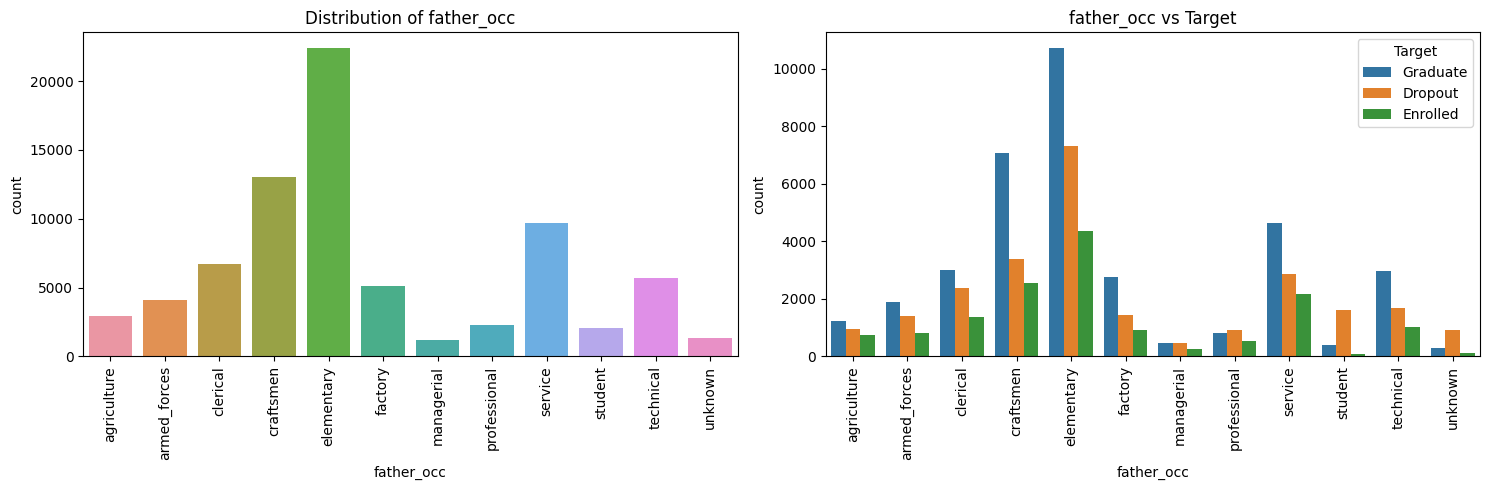

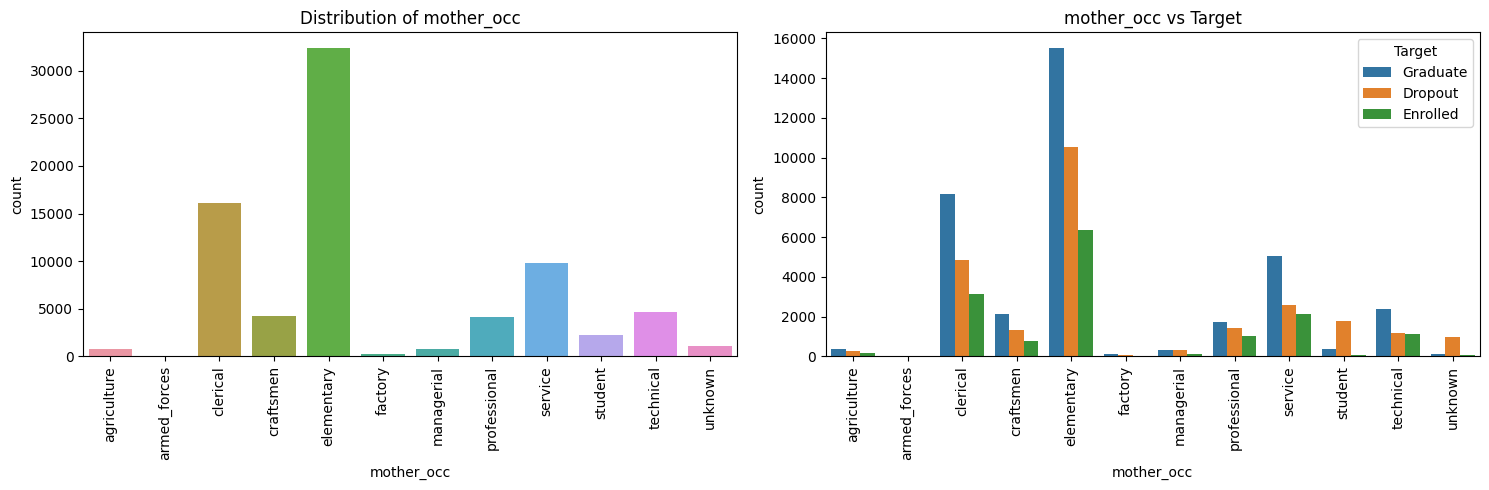

In [52]:
occ_order = train.mother_occ.value_counts().sort_index().index
new_occ = ['father_occ','mother_occ']

for occ in new_occ:
    fig, ax = plt.subplots(1, 2, figsize=(15, 5)) 
    sns.countplot(x=occ, data=train, ax=ax[0],order=occ_order)
    ax[0].set_title(f'Distribution of {occ}')
    ax[0].tick_params(axis='x', rotation=90)
    
    sns.countplot(x=occ, data=train, hue='Target', ax=ax[1],order=occ_order)
    ax[1].set_title(f'{occ} vs Target')
    ax[1].tick_params(axis='x', rotation=90)
    
    plt.tight_layout()
    plt.show()

* Elementary Occupations Dominance: Both fathers' and mothers' elementary occupations are most common and show a high number of graduates, dropouts, and enrolled students.
* Impact of Craftsmanship and Clerical Work: Fathers in craftsmanship and mothers in clerical work also have a significant number of students across all targets.
* Professional and Service Roles: Professional and service occupations for both fathers and mothers tend to be associated with higher numbers of graduates compared to other targets.
* Managerial and Technical Roles: These roles, although less common, generally lean towards a higher number of graduates.

## Define Ordinal Category and Nominal Category:
Based on the previous analysis and the new columns we created. Therefore, the dataset will have 18 original columns + 5 news columns = 23 categorical columns.

* Ordinal Category: 4 columns (Application order, previous_qual, father_qual, mother_qual)
* Remain Column are Nonminal Cateogory: 19 columns

Create column for test set:

In [53]:
test['previous_qual'] = test['Previous qualification'].map(education_categories)
test['father_qual'] = test["Father's qualification"].map(education_categories)
test['mother_qual'] = test["Mother's qualification"].map(education_categories)
test["father_occ"] = test["Father's occupation"].map(profession_categories)
test["mother_occ"] = test["Mother's occupation"].map(profession_categories)

test.head()

id  Marital status  Application mode  Application order  Course  \
0  76518               1                 1                  1    9500   
1  76519               1                 1                  1    9238   
2  76520               1                 1                  1    9238   
3  76521               1                44                  1    9147   
4  76522               1                39                  1    9670   

   Daytime/evening attendance  Previous qualification  \
0                           1                       1   
1                           1                       1   
2                           1                       1   
3                           1                      39   
4                           1                       1   

   Previous qualification (grade)  Nacionality  Mother's qualification  ...  \
0                           141.0            1                       3  ...   
1                           128.0            1                       1  ...   
2                           118.0            1                       1  ...   
3                           130.0            1                       1  ...   
4                           110.0            1                       1  ...   

   Curricular units 2nd sem (grade)  \
0                          0.000000   
1                         13.500000   
2                         11.000000   
3                         11.000000   
4                         10.666667   

   Curricular units 2nd sem (without evaluations)  Unemployment rate  \
0                                               0               13.9   
1                                               0               11.1   
2                                               0               15.5   
3                                               0                8.9   
4                                               2                7.6   

   Inflation rate   GDP    previous_qual      father_qual      mother_qual  \
0            -0.3  0.79  upper_secondary  upper_secondary         graduate   
1             0.6  2.02  upper_secondary  lower_secondary  upper_secondary   
2             2.8 -4.06  upper_secondary  lower_secondary  upper_secondary   
3             1.4  3.51         graduate  lower_secondary  upper_secondary   
4             2.6  0.32  upper_secondary       elementary  upper_secondary   

   father_occ    mother_occ  
0   technical  professional  
1     service      clerical  
2  elementary      clerical  
3   technical     technical  
4     service       service  

[5 rows x 42 columns]

# EDA for Numerical Column:

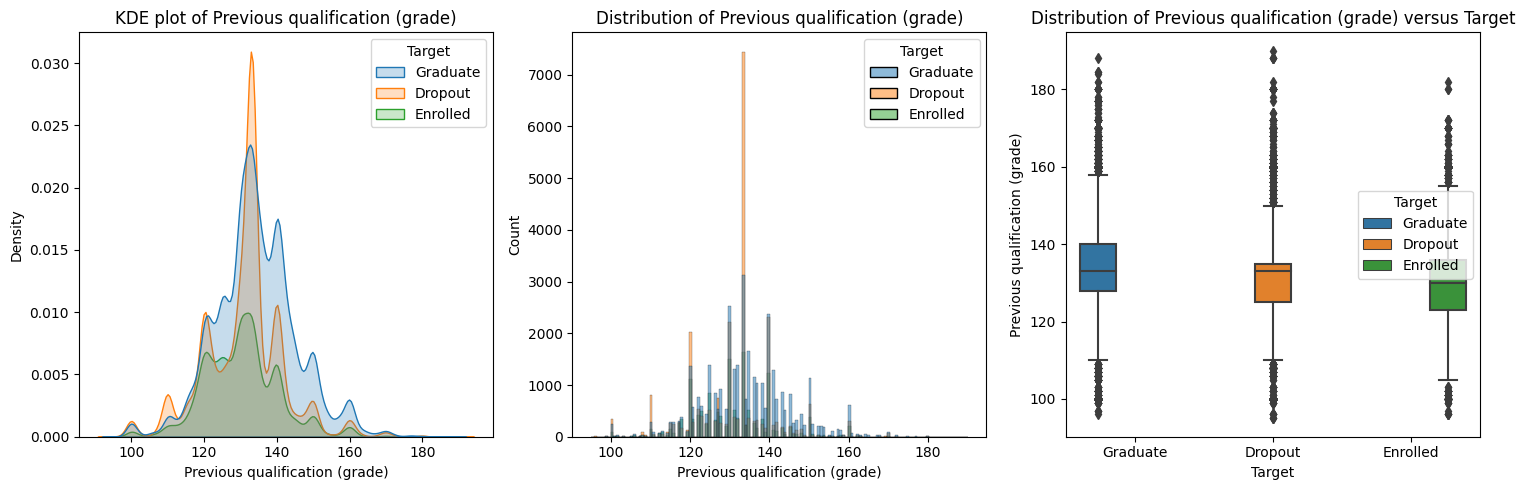

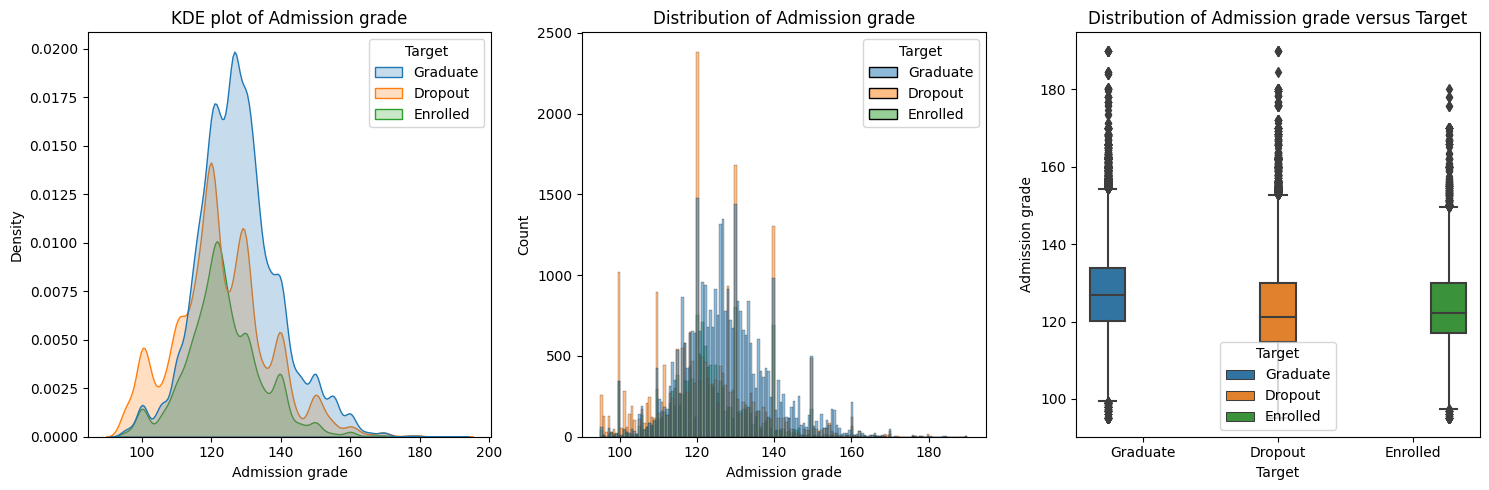

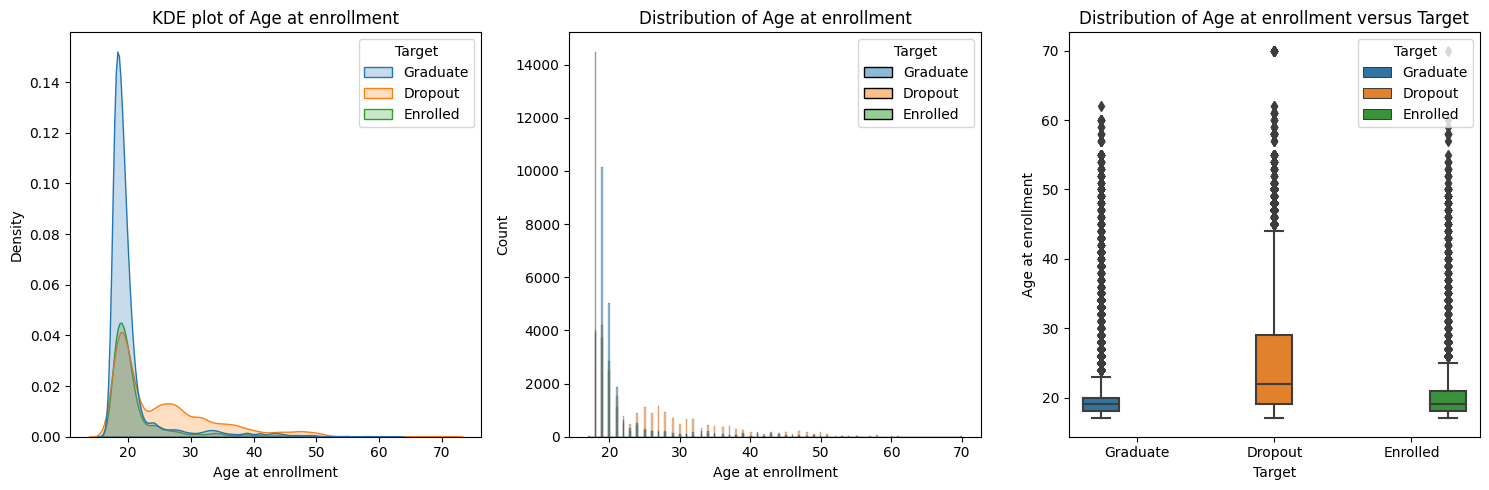

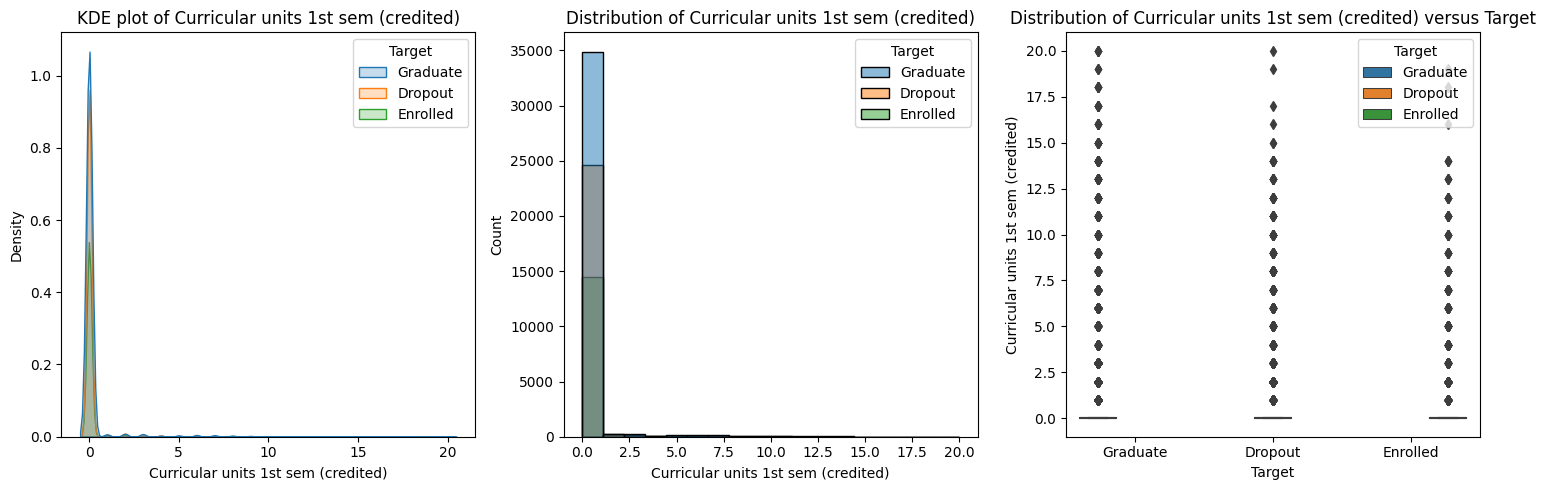

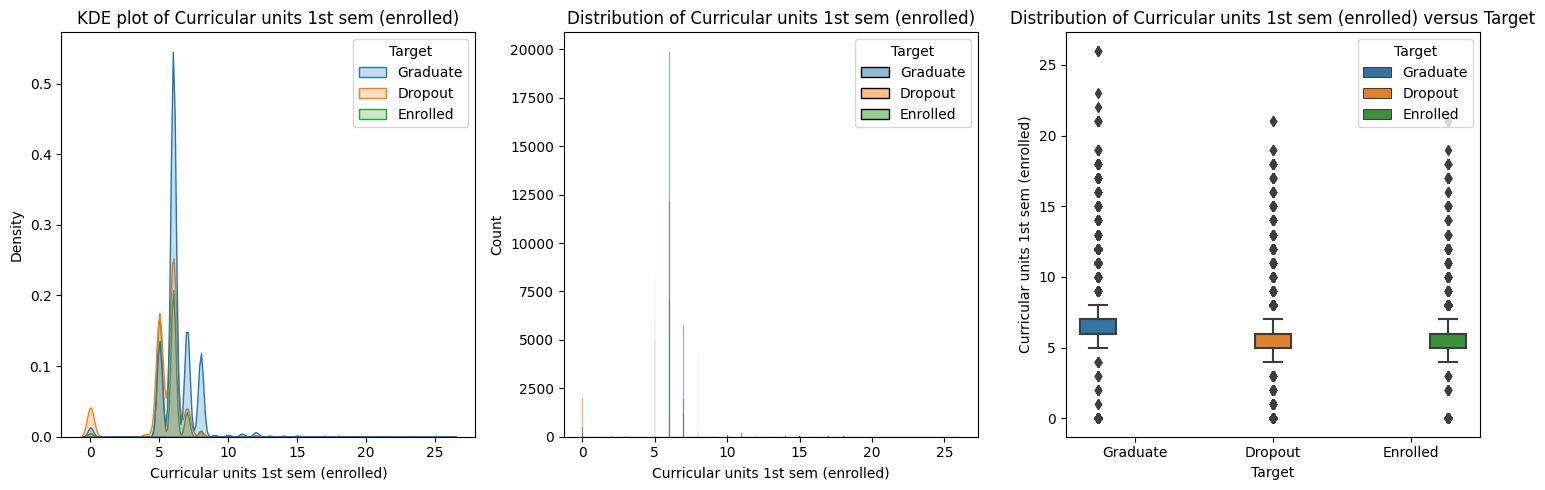

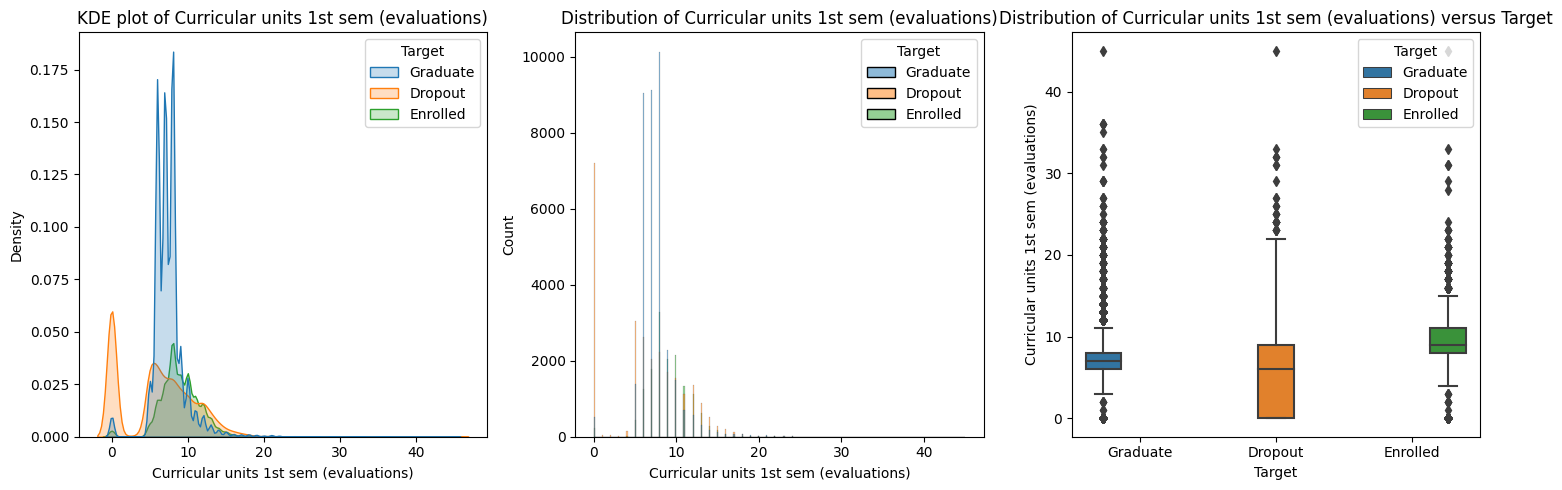

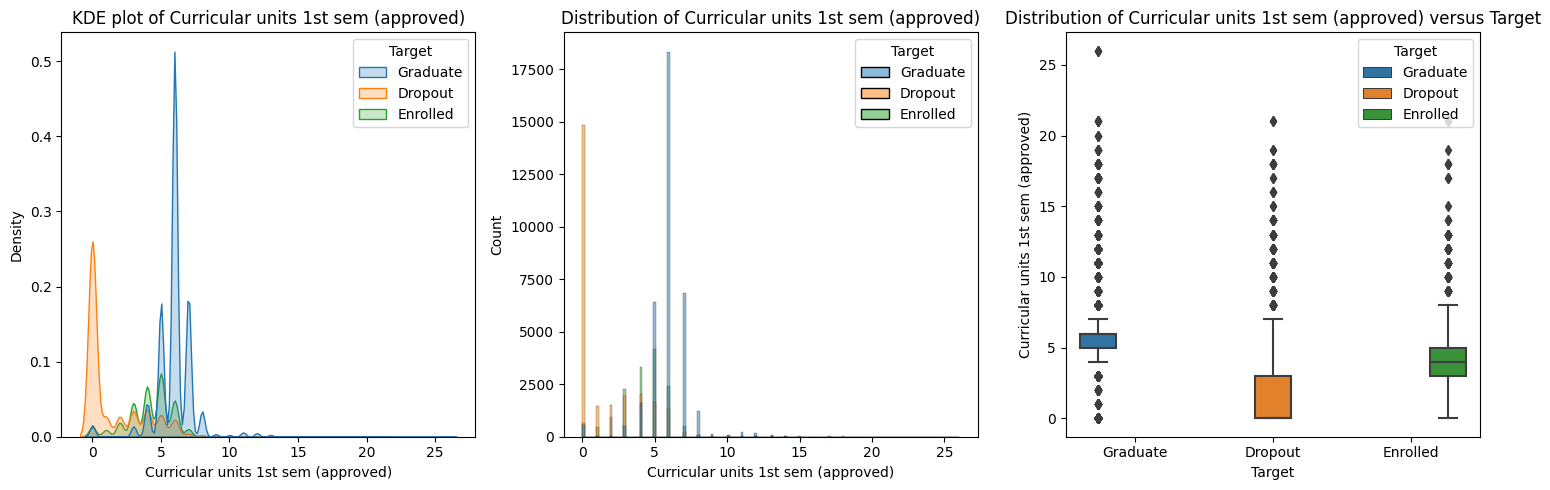

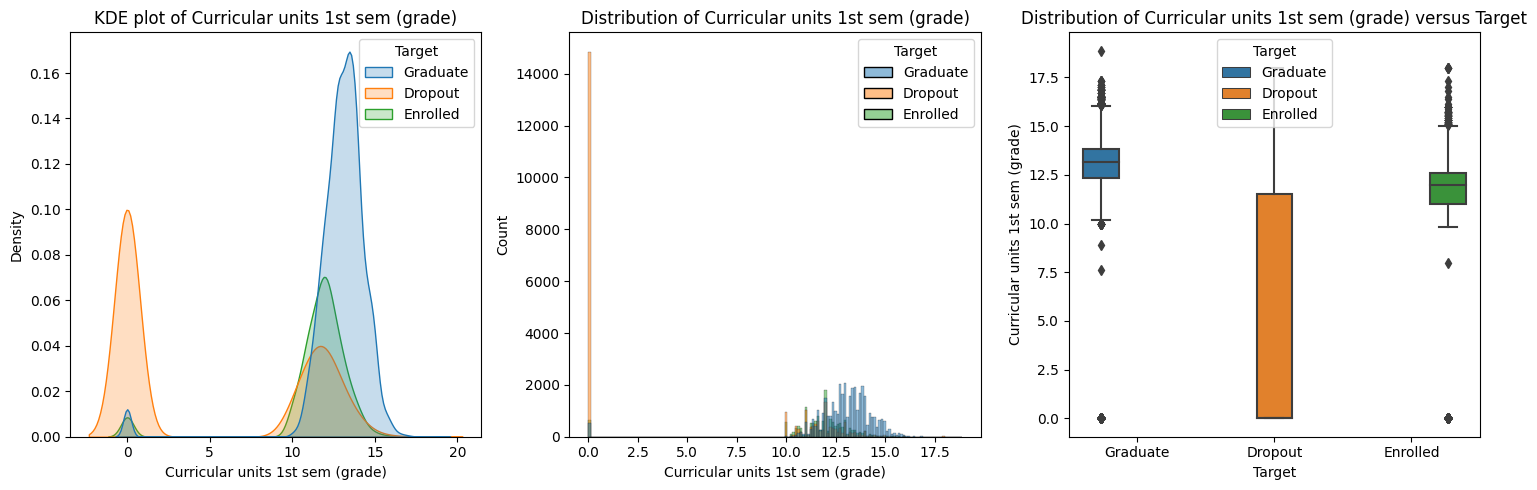

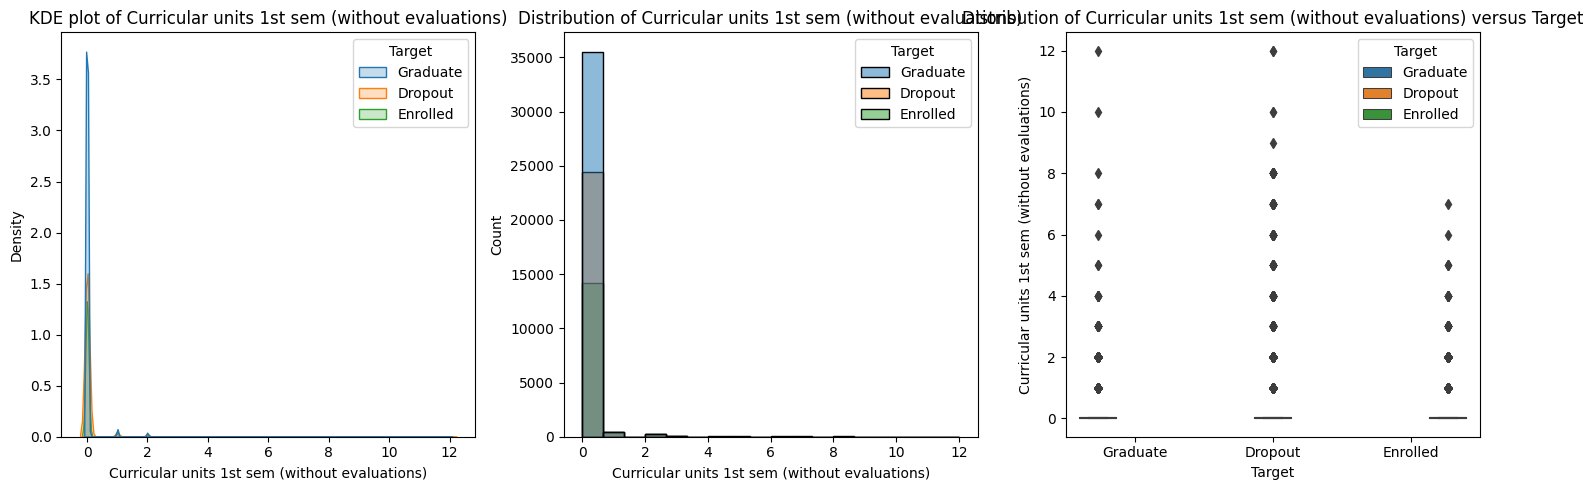

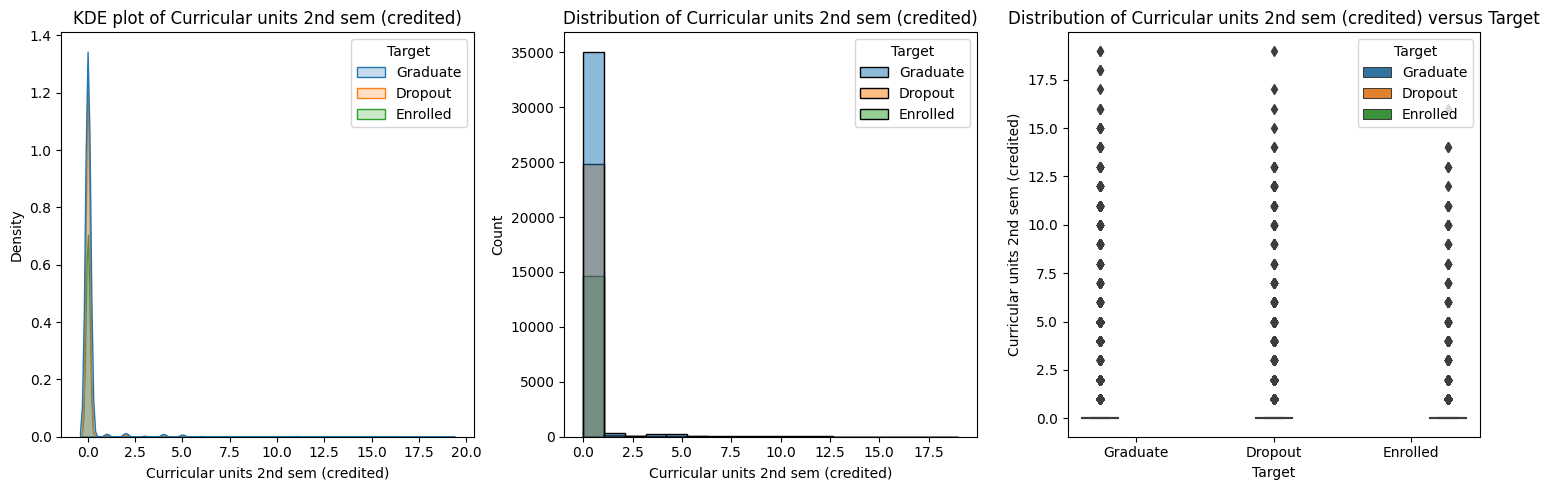

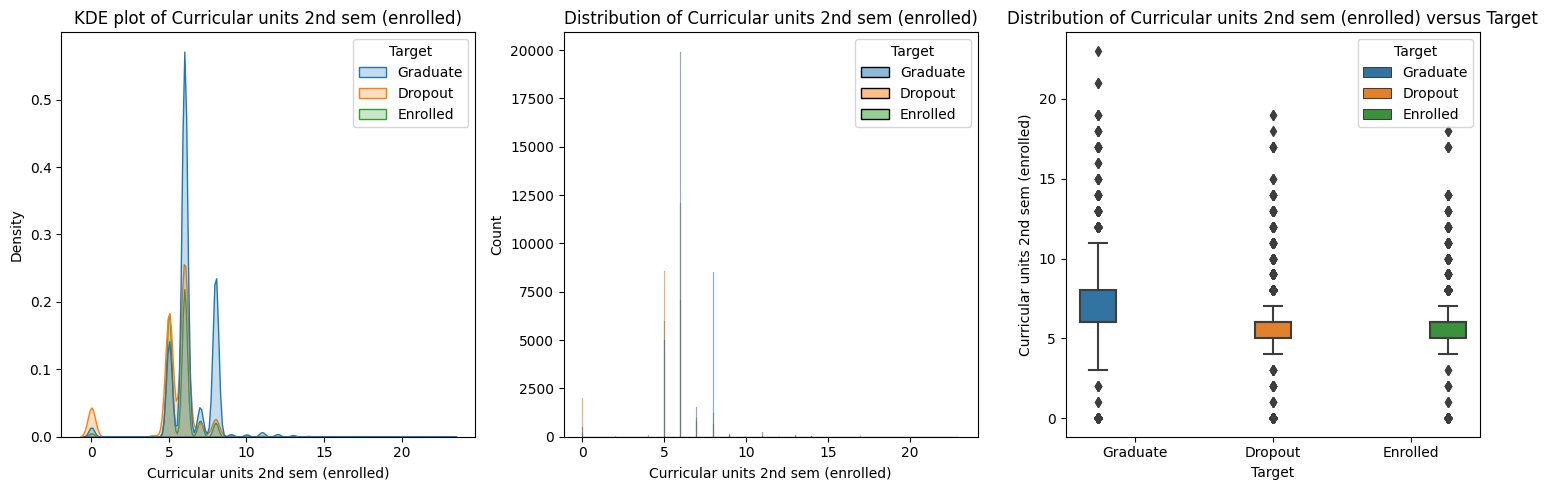

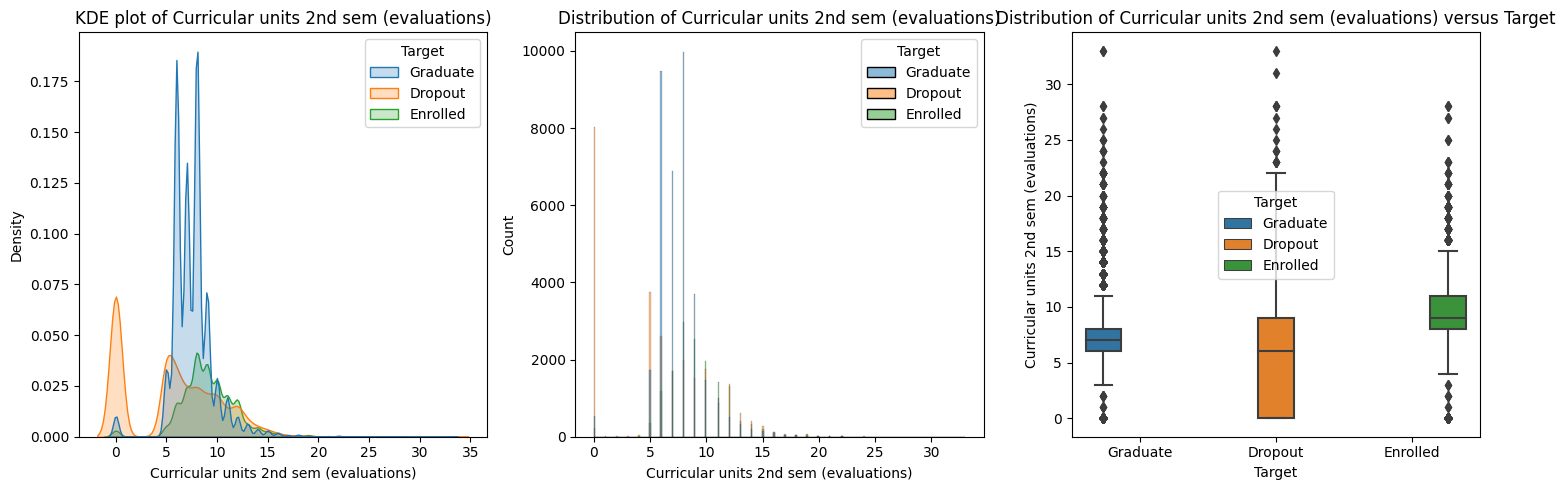

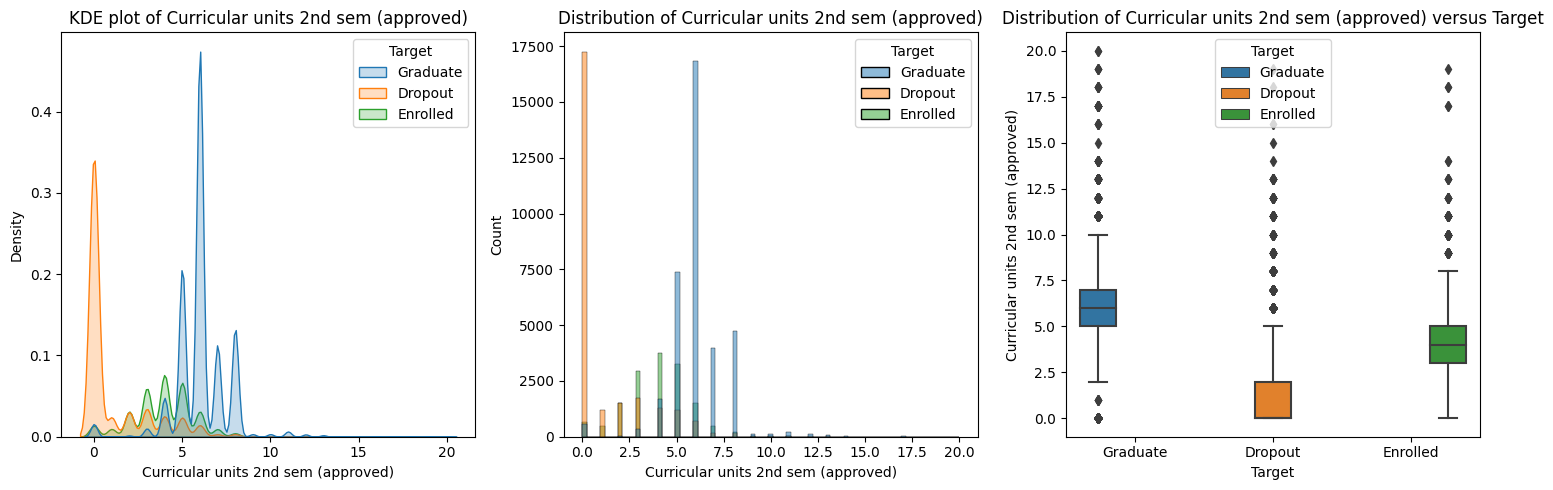

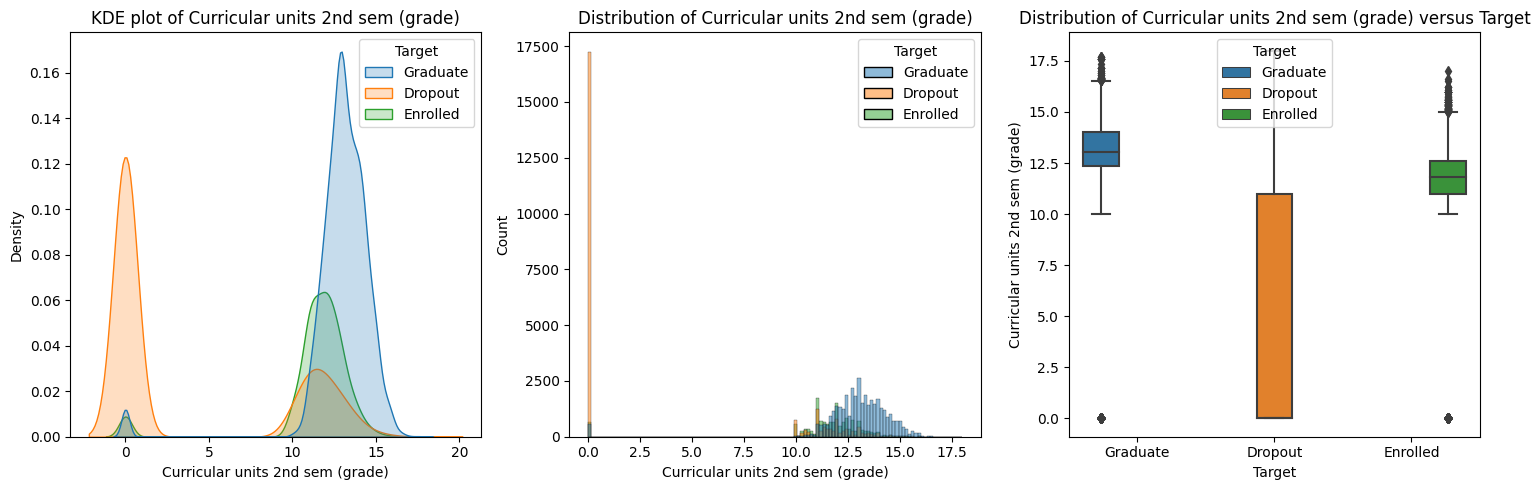

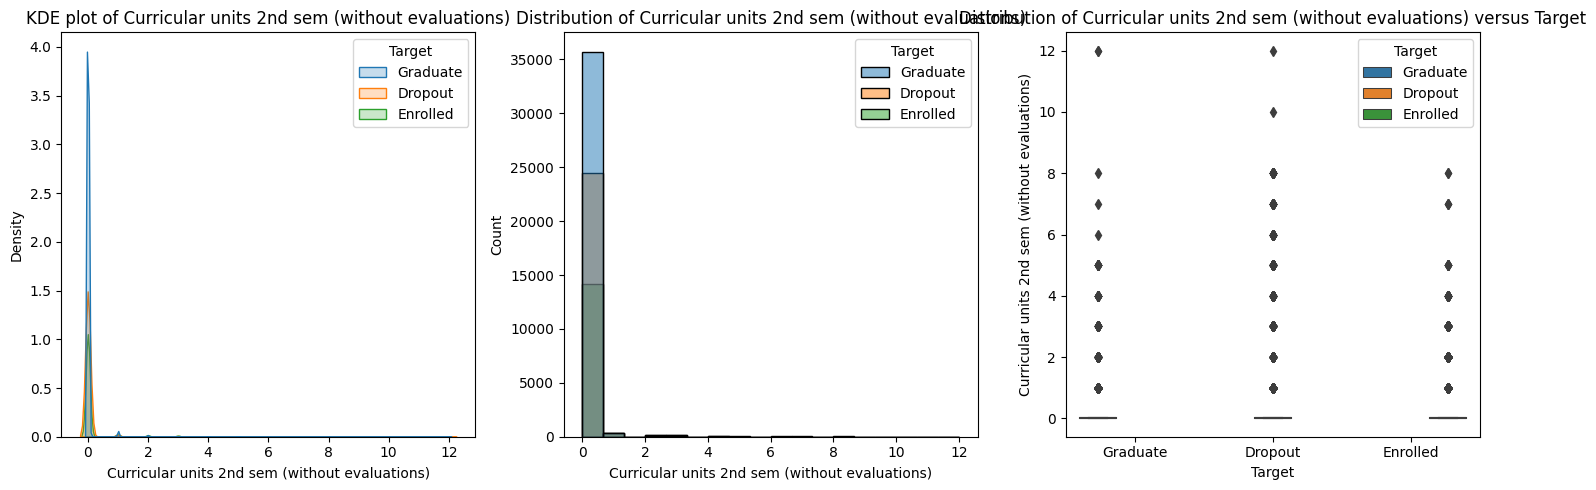

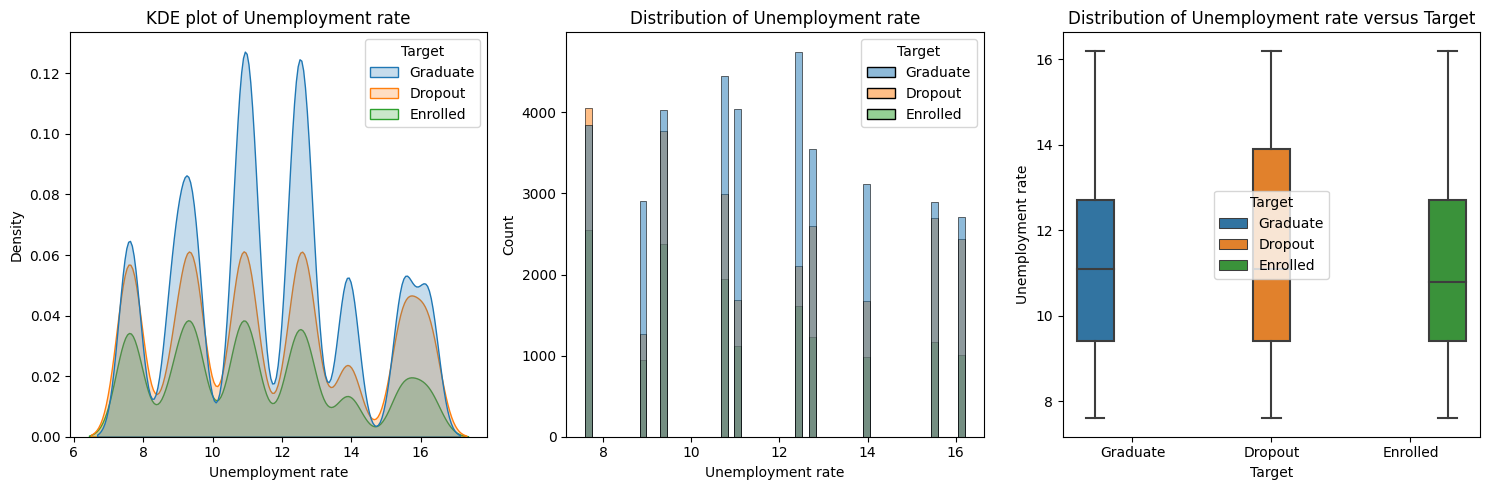

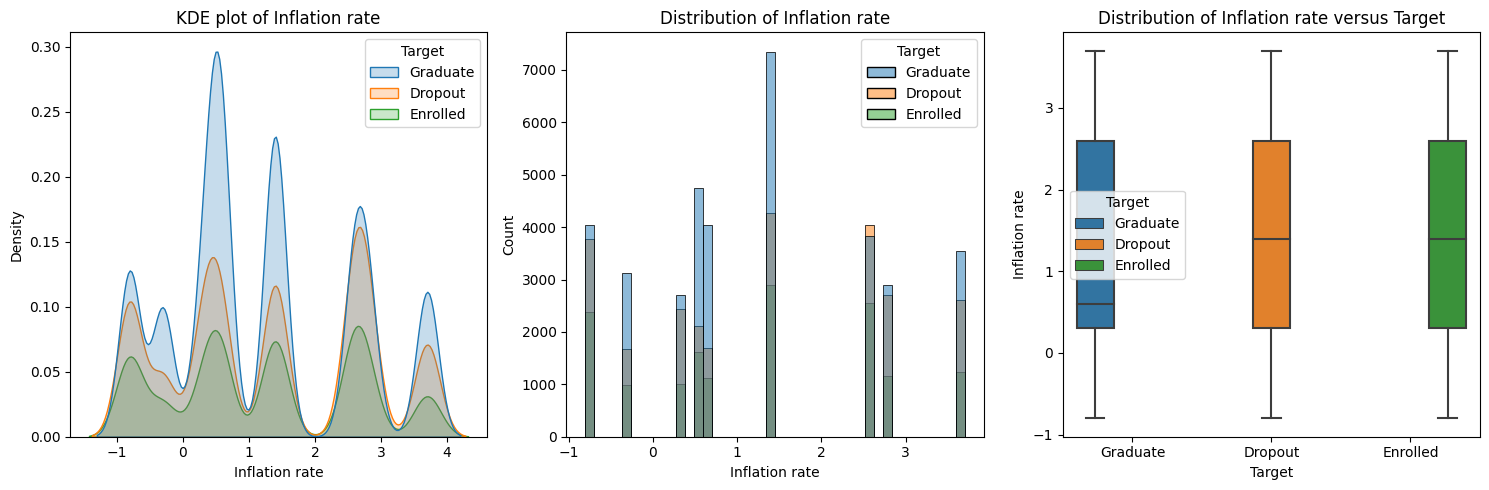

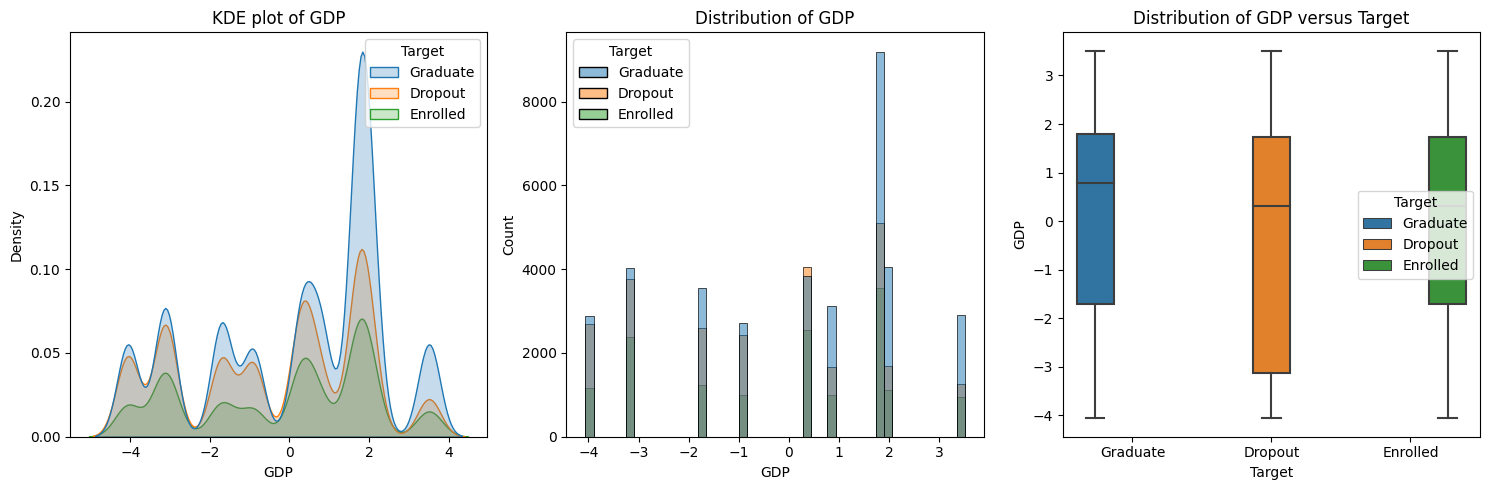

In [54]:
for num in num_features:
    fig, ax = plt.subplots(1,3,figsize=(15,5))
    sns.kdeplot(x=num,hue='Target',data=train,ax=ax[0],fill=True)
    ax[0].set_title(f'KDE plot of {num}')
    
    sns.histplot(x=num,data=train,hue='Target',ax=ax[1])
    ax[1].set_title(f'Distribution of {num}')
    
    sns.boxplot(y=num,x='Target',hue='Target',data=train,ax=ax[2])
    ax[2].set_title(f'Distribution of {num} versus Target')
    
    plt.tight_layout()
    plt.show()

* GDP lower ==> Chance to Dropout increase.

* Curricular units between two sem (evaluations / approved / grade) Lower ==> Dropout increase.

* Age at enrollment higher ==> Higher chance to droupout.

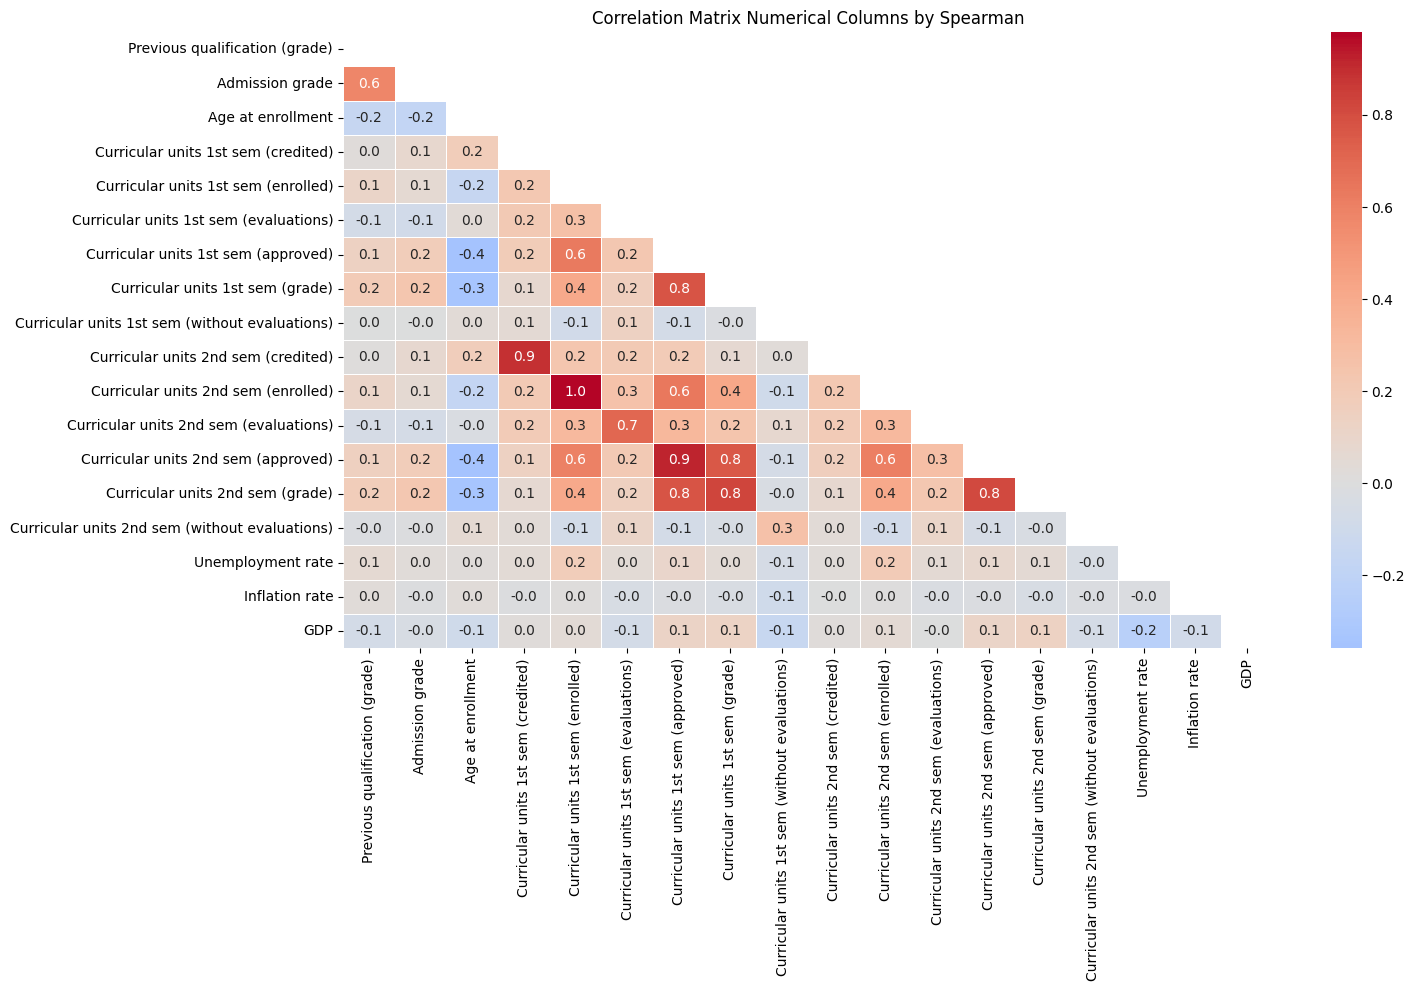

In [55]:
mask = np.triu(np.ones_like(train[num_features].corr(method='spearman')))
plt.figure(figsize=(15, 8))
sns.heatmap(train[num_features].corr(method='spearman'), center=0, cmap='coolwarm', linewidth=.5,annot=True,fmt='.1f',mask = mask)
plt.title('Correlation Matrix Numerical Columns by Spearman')
plt.show()

In [56]:
high_pairs = train[num_features].corr(method='spearman').where(np.tril(np.ones(train[num_features].corr(method='spearman').shape), k=-1).astype(bool))
high_pairs = high_pairs.stack().reset_index()
high_pairs.columns = ['Feature 1', 'Feature 2', 'Correlation']
high_pairs = high_pairs[high_pairs['Correlation'] >= 0.75]

high = high_pairs.sort_values('Correlation',ascending=False)
high

Feature 1                            Feature 2  \
49  Curricular units 2nd sem (enrolled)  Curricular units 1st sem (enrolled)   
72  Curricular units 2nd sem (approved)  Curricular units 1st sem (approved)   
39  Curricular units 2nd sem (credited)  Curricular units 1st sem (credited)   
85     Curricular units 2nd sem (grade)     Curricular units 1st sem (grade)   
90     Curricular units 2nd sem (grade)  Curricular units 2nd sem (approved)   
84     Curricular units 2nd sem (grade)  Curricular units 1st sem (approved)   
27     Curricular units 1st sem (grade)  Curricular units 1st sem (approved)   
73  Curricular units 2nd sem (approved)     Curricular units 1st sem (grade)   

    Correlation  
49     0.979514  
72     0.921124  
39     0.886422  
85     0.824039  
90     0.809535  
84     0.778923  
27     0.772579  
73     0.760199

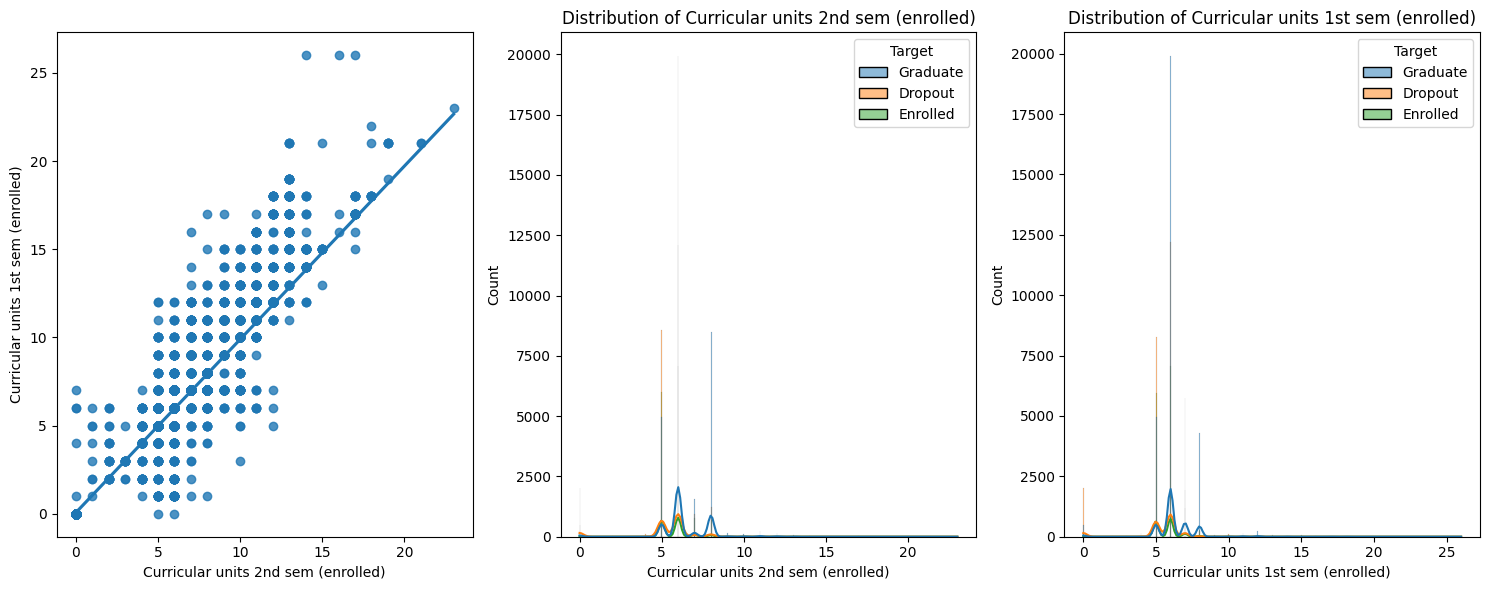

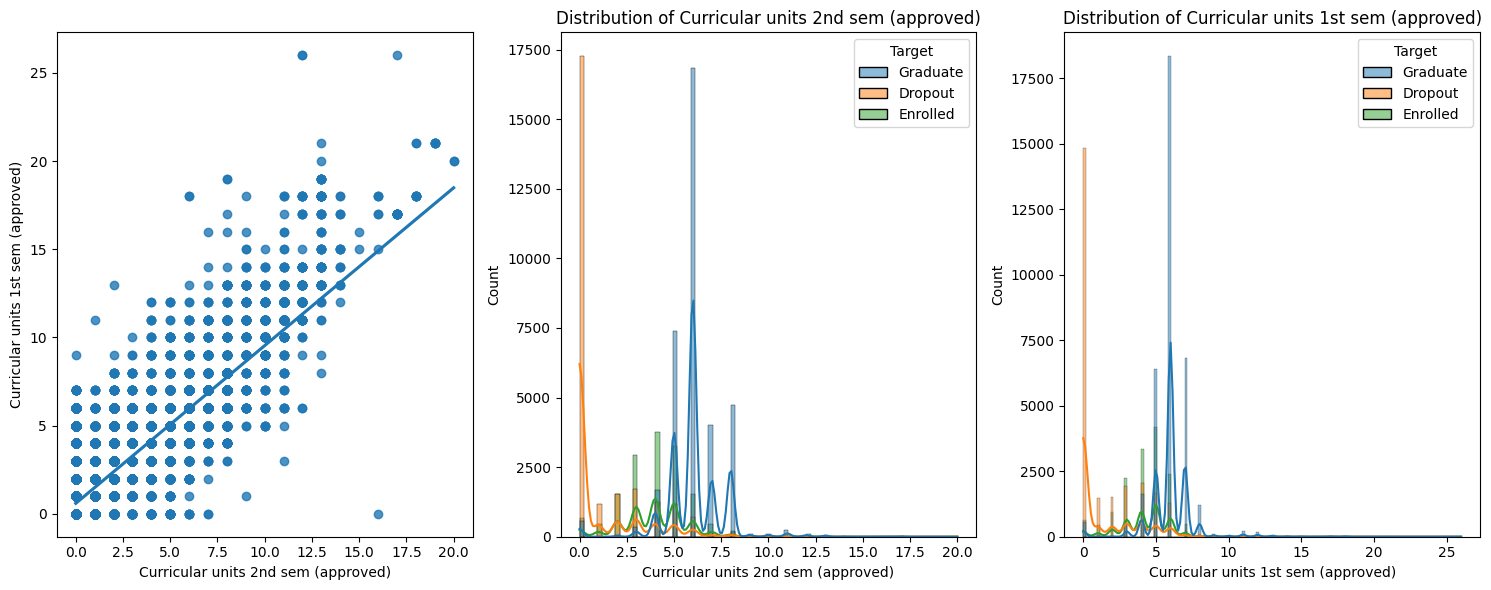

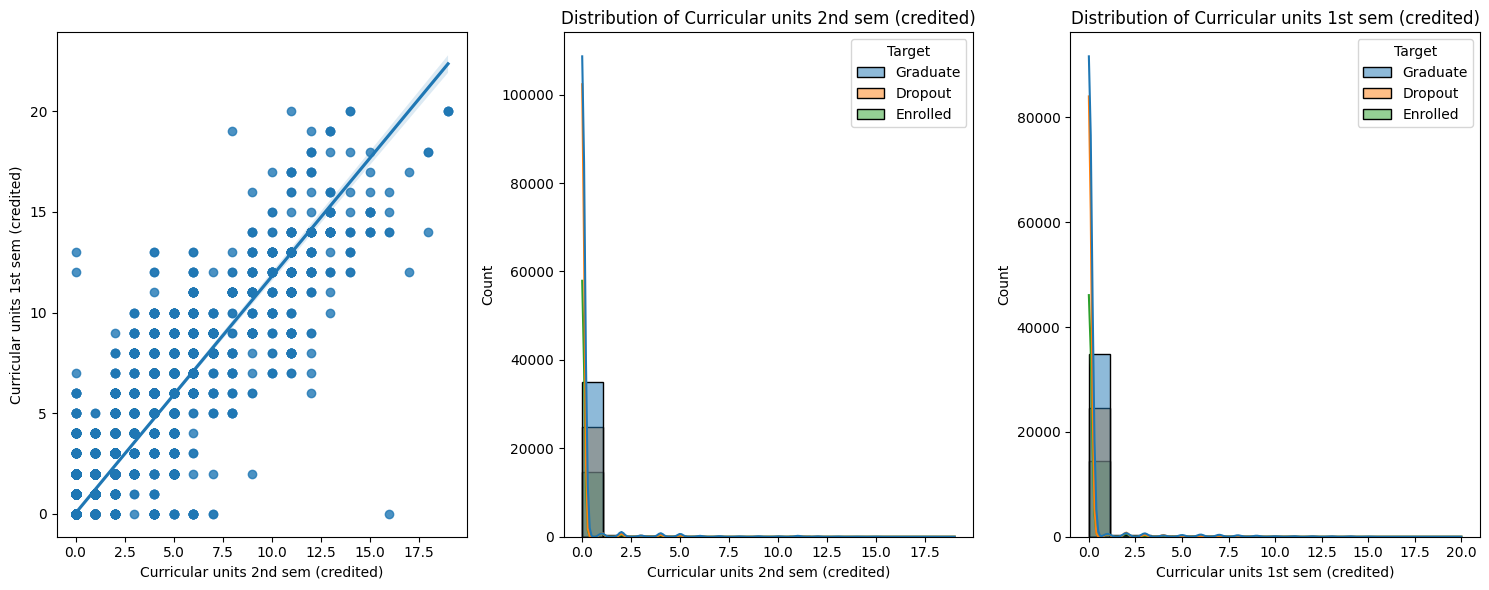

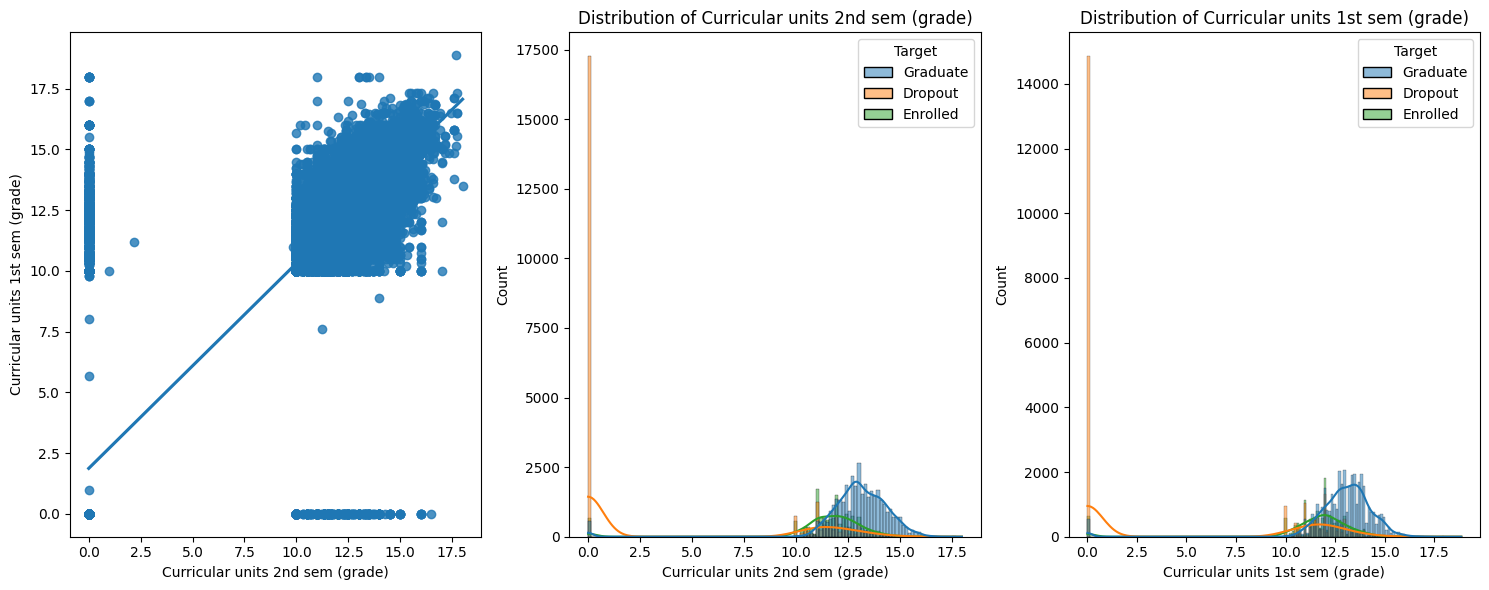

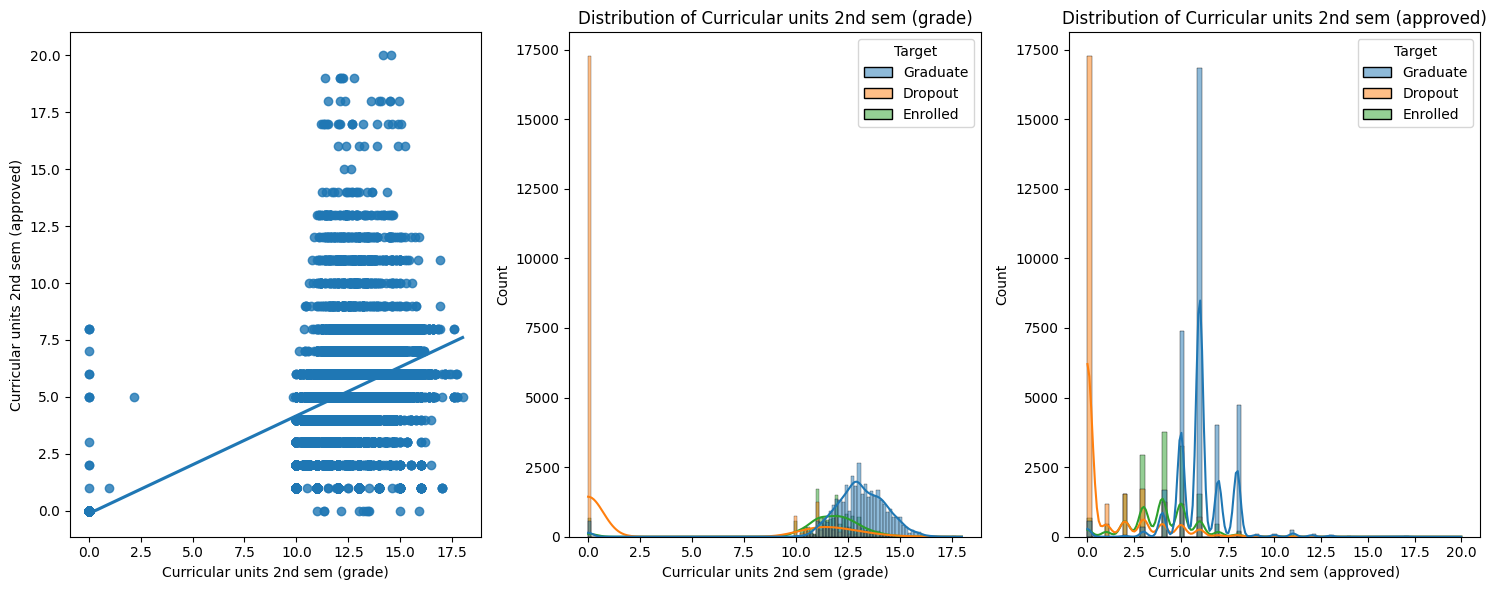

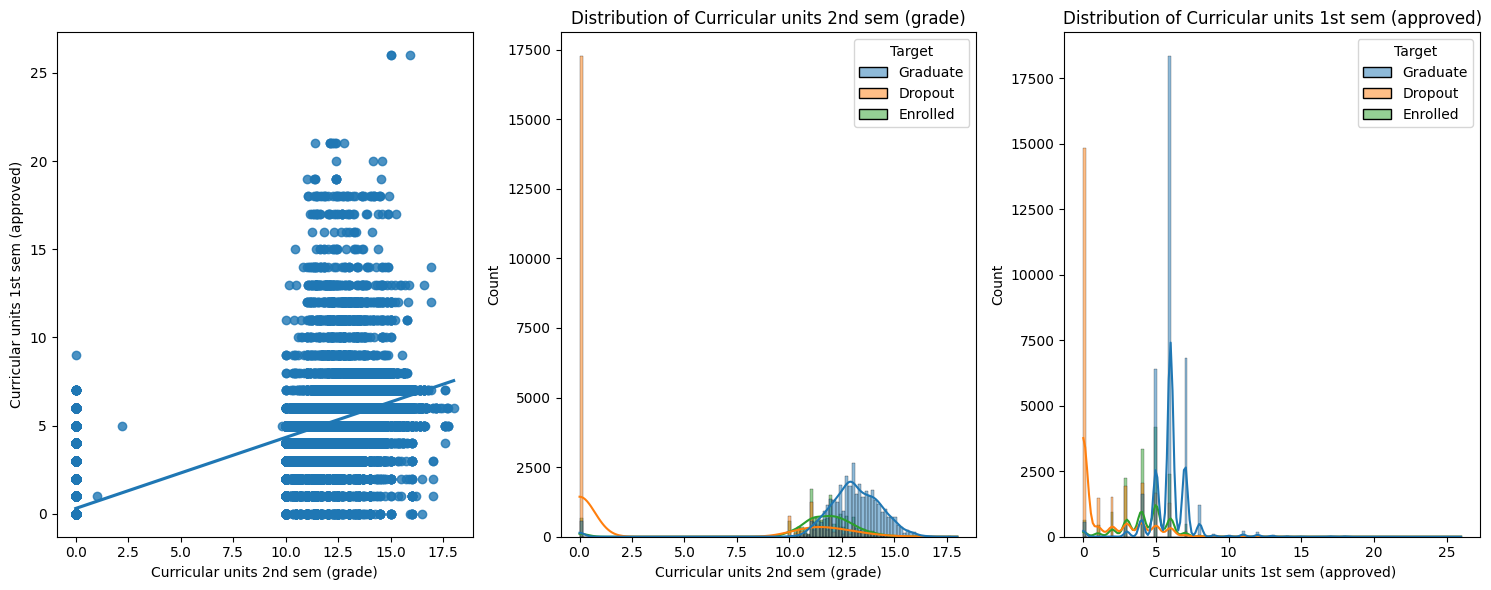

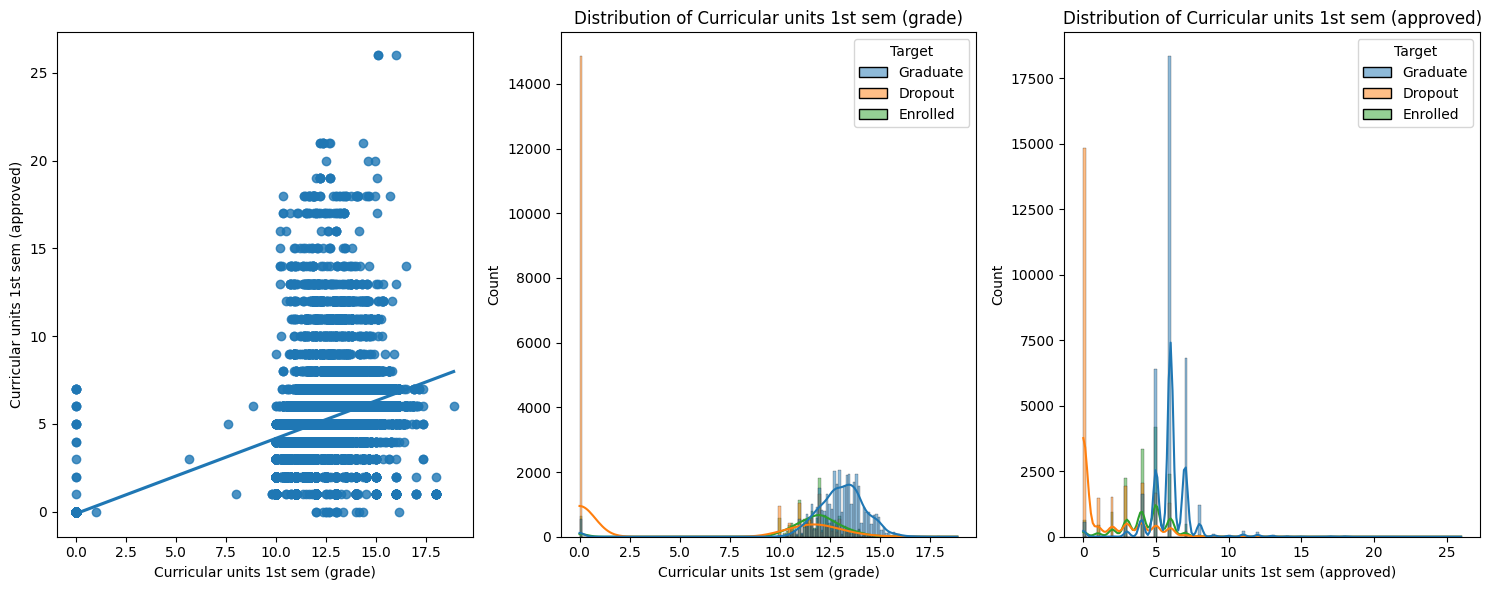

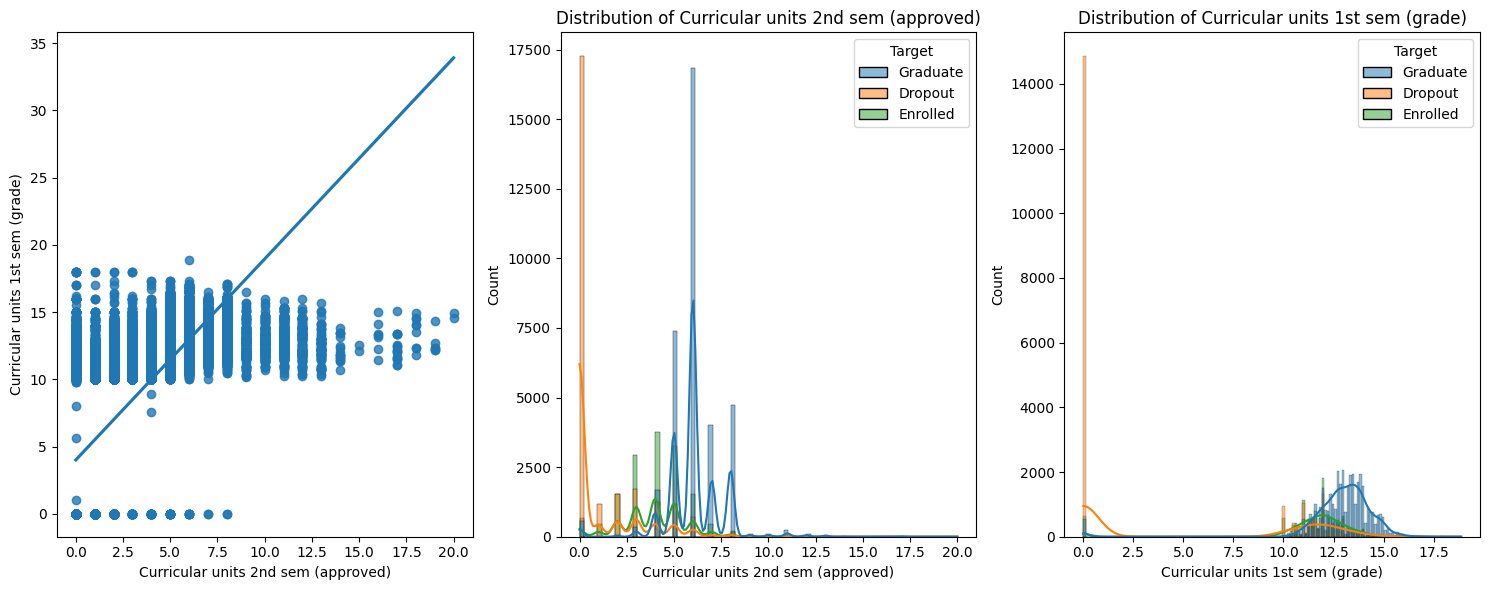

In [57]:
for i, v in high.iterrows():
    fig, ax = plt.subplots(1,3, figsize = (15,6))
    sns.regplot(x=v['Feature 1'], y= v['Feature 2'], data=train, ax=ax[0])
    sns.histplot(x=v['Feature 1'],data=train,ax=ax[1],fill=True,hue='Target',kde=True)
    sns.histplot(x=v['Feature 2'],data=train,ax=ax[2],fill=True,hue='Target',kde=True)
    ax[1].set_title('Distribution of {}'.format(str(v['Feature 1'])))
    ax[2].set_title('Distribution of {}'.format(str(v['Feature 2'])))
    plt.tight_layout()
    plt.show()

In [58]:
train[num_features].skew().sort_values()

Curricular units 1st sem (grade)                  -1.266245
Curricular units 2nd sem (grade)                  -1.066043
Curricular units 2nd sem (enrolled)               -0.566424
GDP                                               -0.376957
Curricular units 2nd sem (evaluations)            -0.175259
Curricular units 2nd sem (approved)               -0.152288
Curricular units 1st sem (approved)               -0.115426
Curricular units 1st sem (evaluations)             0.088983
Previous qualification (grade)                     0.221560
Unemployment rate                                  0.230696
Inflation rate                                     0.234880
Curricular units 1st sem (enrolled)                0.290642
Admission grade                                    0.402557
Age at enrollment                                  2.369729
Curricular units 1st sem (credited)                8.224950
Curricular units 2nd sem (credited)                9.482462
Curricular units 2nd sem (without evalua

All the number column have outlier => we will use RobustScaler

# Data Preprocessing

In [59]:
train.head()

id  Marital status  Application mode  Application order  Course  \
0   0               1                 1                  1    9238   
1   1               1                17                  1    9238   
2   2               1                17                  2    9254   
3   3               1                 1                  3    9500   
4   4               1                 1                  2    9500   

   Daytime/evening attendance  Previous qualification  \
0                           1                       1   
1                           1                       1   
2                           1                       1   
3                           1                       1   
4                           1                       1   

   Previous qualification (grade)  Nacionality  Mother's qualification  ...  \
0                           126.0            1                       1  ...   
1                           125.0            1                      19  ...   
2                           137.0            1                       3  ...   
3                           131.0            1                      19  ...   
4                           132.0            1                      19  ...   

   Curricular units 2nd sem (without evaluations)  Unemployment rate  \
0                                               0               11.1   
1                                               0               11.1   
2                                               0               16.2   
3                                               0               11.1   
4                                               0                7.6   

   Inflation rate   GDP    Target    previous_qual      father_qual  \
0             0.6  2.02  Graduate  upper_secondary  lower_secondary   
1             0.6  2.02   Dropout  upper_secondary  lower_secondary   
2             0.3 -0.92   Dropout  upper_secondary  lower_secondary   
3             0.6  2.02  Enrolled  upper_secondary         graduate   
4             2.6  0.32  Graduate  upper_secondary       elementary   

       mother_qual    father_occ    mother_occ  
0  upper_secondary       service       service  
1  lower_secondary    elementary    elementary  
2         graduate     technical  professional  
3  lower_secondary  professional     technical  
4  lower_secondary    elementary      clerical  

[5 rows x 43 columns]

In [60]:
test.head()

id  Marital status  Application mode  Application order  Course  \
0  76518               1                 1                  1    9500   
1  76519               1                 1                  1    9238   
2  76520               1                 1                  1    9238   
3  76521               1                44                  1    9147   
4  76522               1                39                  1    9670   

   Daytime/evening attendance  Previous qualification  \
0                           1                       1   
1                           1                       1   
2                           1                       1   
3                           1                      39   
4                           1                       1   

   Previous qualification (grade)  Nacionality  Mother's qualification  ...  \
0                           141.0            1                       3  ...   
1                           128.0            1                       1  ...   
2                           118.0            1                       1  ...   
3                           130.0            1                       1  ...   
4                           110.0            1                       1  ...   

   Curricular units 2nd sem (grade)  \
0                          0.000000   
1                         13.500000   
2                         11.000000   
3                         11.000000   
4                         10.666667   

   Curricular units 2nd sem (without evaluations)  Unemployment rate  \
0                                               0               13.9   
1                                               0               11.1   
2                                               0               15.5   
3                                               0                8.9   
4                                               2                7.6   

   Inflation rate   GDP    previous_qual      father_qual      mother_qual  \
0            -0.3  0.79  upper_secondary  upper_secondary         graduate   
1             0.6  2.02  upper_secondary  lower_secondary  upper_secondary   
2             2.8 -4.06  upper_secondary  lower_secondary  upper_secondary   
3             1.4  3.51         graduate  lower_secondary  upper_secondary   
4             2.6  0.32  upper_secondary       elementary  upper_secondary   

   father_occ    mother_occ  
0   technical  professional  
1     service      clerical  
2  elementary      clerical  
3   technical     technical  
4     service       service  

[5 rows x 42 columns]

In [73]:
# Define category columns
cat = cat_features + new
num = num_features

cat_ordinal = ['Application order', 'previous_qual','father_qual','mother_qual']
cat_nominal = list(set(cat) - set(cat_ordinal))

['father_occ',
 'Displaced',
 'Course',
 'mother_occ',
 'Application mode',
 'International',
 'Scholarship holder',
 "Father's qualification",
 'Tuition fees up to date',
 'Gender',
 'Nacionality',
 'Marital status',
 'Daytime/evening attendance',
 'Previous qualification',
 'Debtor',
 "Mother's qualification",
 'Educational special needs',
 "Mother's occupation",
 "Father's occupation"]

## NOTE:

cat_labelencoder will be use for Target column

Onehotencoder for nominal with drop = true to avoid dummy variable trap

OrdinalEncoder will be used for nominal

for ordinal; check the value after fit_transform between 3 columns previous_qual, father_qual and mother_qual

Why Use LabelEncoder for y and OrdinalEncoder for X?
Target Variable (y):

For classification problems, LabelEncoder is used to encode the target variable. This is because the target variable represents categories that the model aims to predict. The encoded values are not ordinal; they are just numeric representations of the classes.
Feature Columns (X):

For ordinal categorical features, OrdinalEncoder is used because it preserves the order of categories. This is crucial for models that can leverage the order information in the features, such as linear models or tree-based models.

In [71]:
cat

['Marital status',
 'Application mode',
 'Application order',
 'Course',
 'Daytime/evening attendance',
 'Previous qualification',
 'Nacionality',
 "Mother's qualification",
 "Father's qualification",
 "Mother's occupation",
 "Father's occupation",
 'Displaced',
 'Educational special needs',
 'Debtor',
 'Tuition fees up to date',
 'Gender',
 'Scholarship holder',
 'International',
 'previous_qual',
 'father_qual',
 'mother_qual',
 'father_occ',
 'mother_occ']

In [ ]:
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
# from sklearn.pipeline import Pipeline
# from sklearn.impute import SimpleImputer
# from sklearn.ensemble import RandomForestClassifier

# # Sample data
# data = pd.DataFrame({
#     'ordinal_feature': ['low', 'medium', 'high', 'medium', 'low'],
#     'nominal_feature': ['A', 'B', 'A', 'C', 'B'],
#     'numeric_feature': [1, 2, np.nan, 4, 5],
#     'target': [0, 1, 0, 1, 0]
# })

# # Define which columns are ordinal and which are nominal
# ordinal_columns = ['ordinal_feature']
# nominal_columns = ['nominal_feature']
# numeric_columns = ['numeric_feature']

# # Define the preprocessing steps for each type of column
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('ordinal', OrdinalEncoder(), ordinal_columns),
#         ('nominal', OneHotEncoder(), nominal_columns),
#         ('numeric', SimpleImputer(strategy='mean'), numeric_columns)
#     ])



quantiletransformer for numerical columns

from sklearn.preprocessing import QuantileTransformer
quantile = QuantileTransformer(output_distribution='normal')